# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

Se importan la principales librerias que se van a emplear en el desarrollo del proyecto, así como los datos del flujo vehicular del año 2016 al 2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

In [6]:
data_2016.info()
data_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379443 entries, 0 to 1379442
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1379443 non-null  int64 
 1   fecha           1379443 non-null  object
 2   hora_inicio     1379443 non-null  int64 
 3   hora_fin        1379443 non-null  int64 
 4   dia             1379443 non-null  object
 5   estacion        1379443 non-null  object
 6   sentido         1379443 non-null  object
 7   tipo_vehiculo   1379443 non-null  object
 8   forma_pago      1379443 non-null  object
 9   cantidad_pasos  1379443 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.2+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
1     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
2     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
3     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
4     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              32  
1       Liviano      AUPASS               9  
2       Liviano  NO COBRADO               1  
3       Liviano    EFECTIVO               4  
4       Liviano      EXENTO               3

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [7]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())
print(data_2016['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [8]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())
print(data_2016['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [9]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())
print(data_2016['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [10]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())
print(data_2016['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']
['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']


# Análisis Exploratorio de Datos

##### Podemos decir entonces que los años 2016,2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

In [11]:
#Unimos los 4 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
df = pd.concat([data_2019, data_2018, data_2017,data_2016])


In [12]:
df.shape

(4940149, 10)

In [13]:
df.head()

periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

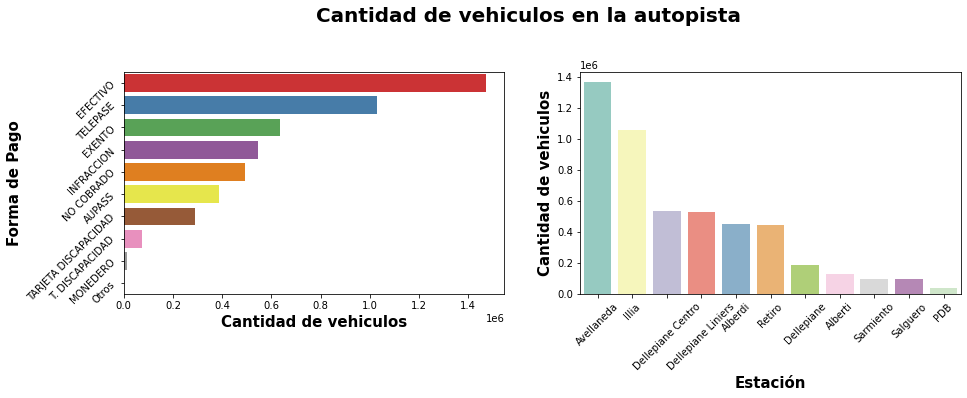

In [14]:
plt.figure(figsize=(15,9))
plt.suptitle('Cantidad de vehiculos en la autopista' , fontweight = 'black', fontsize=20)

plt.subplot(2,2,1)
sns.countplot(y='forma_pago',data = df,palette="Set1",order= df['forma_pago'].value_counts().index)
plt.xlabel("Cantidad de vehiculos", fontweight = "black", fontsize = 15)
plt.ylabel("Forma de Pago", fontweight = "black", fontsize = 15)
plt.yticks(rotation = 45)

plt.subplot(2,2,2)
sns.countplot(x='estacion',data = df,palette="Set3",order= df['estacion'].value_counts().index)
plt.xlabel("Estación", fontweight = "black", fontsize = 15)
plt.ylabel("Cantidad de vehiculos", fontweight = "black", fontsize = 15)
plt.xticks(rotation = 45);


Se puede observar que entre el año 2016 al 2019 la forma de pago que mas se utiliza es el fectivo y la autopista con más flujo de vehiculos es la Avellaneda

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**. Ademas, no se tienen en cuenta variables que no apartan información o que son redundantes como el periodo, ya que contamos con la fecha en la que paso cada vehiculo, de igual forma sucede con la hora de inicio, esto debido a que se trabajará con la hora fin. Tmabíen se eliminan las variables forma de pago y estación ya que estas van a ser filtradas con una sola categoria, y dejarlas no aparta información.

In [15]:
#Unimos los 4 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017,data_2016])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

#Renombrar columna
dataset.rename({"cantidad_pasos": "cantidad_vehiculos"}, axis=1, inplace=True)

dataset.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_vehiculos
80   2019-01-01         2  Martes     Centro       Liviano                 537
86   2019-01-01         2  Martes     Centro        Pesado                   1
88   2019-01-01         2  Martes  Provincia       Liviano                 443
94   2019-01-01         2  Martes  Provincia        Pesado                   1
149  2019-01-01         3  Martes     Centro       Liviano                 769

In [16]:
dataset.info()
dataset.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346566 entries, 80 to 1379053
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   fecha               346566 non-null  object
 1   hora_fin            346566 non-null  int64 
 2   dia                 346566 non-null  object
 3   sentido             346566 non-null  object
 4   tipo_vehiculo       346566 non-null  object
 5   cantidad_vehiculos  346566 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 18.5+ MB


fecha  hora_fin     dia    sentido tipo_vehiculo  \
1379039  2016-12-31        22  Sábado  Provincia       Liviano   
1379042  2016-12-31        22  Sábado  Provincia        Pesado   
1379046  2016-12-31        23  Sábado  Provincia       Liviano   
1379048  2016-12-31        23  Sábado  Provincia       Liviano   
1379053  2016-12-31        23  Sábado  Provincia        Pesado   

         cantidad_vehiculos  
1379039                 788  
1379042                   3  
1379046                   5  
1379048                 207  
1379053                   5

In [17]:
dataset.describe()

hora_fin  cantidad_vehiculos
count  346566.000000       346566.000000
mean       11.918463          193.576415
std         6.729769          409.645149
min         0.000000            1.000000
25%         6.000000            2.000000
50%        12.000000           11.000000
75%        18.000000           79.000000
max        23.000000         2575.000000

Se puede observar que la minima cantidad de vehiculos que tiene el set de datos es de 1, lo que implica que por esta parte no se tiene información atípica, ya que seria un oulitier que el minimo dato que se tenga de vehiculos que pasan por la utopista sea  de cero cuando la estación esta abierta.

In [18]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

dia    sentido tipo_vehiculo  cantidad_vehiculos              fecha2
80   Martes     Centro       Liviano                 537 2019-01-01 02:00:00
86   Martes     Centro        Pesado                   1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano                 443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado                   1 2019-01-01 02:00:00
149  Martes     Centro       Liviano                 769 2019-01-01 03:00:00

In [19]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia    sentido tipo_vehiculo  cantidad_vehiculos               fecha
80   Martes     Centro       Liviano                 537 2019-01-01 02:00:00
86   Martes     Centro        Pesado                   1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano                 443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado                   1 2019-01-01 02:00:00
149  Martes     Centro       Liviano                 769 2019-01-01 03:00:00

In [20]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

dia    sentido tipo_vehiculo  cantidad_vehiculos  \
0       Viernes     Centro       Liviano                  14   
1       Viernes     Centro        Pesado                   3   
2       Viernes  Provincia       Liviano                  66   
3       Viernes  Provincia        Pesado                   1   
4       Viernes  Provincia        Pesado                   4   
...         ...        ...           ...                 ...   
346561   Martes  Provincia       Liviano                 556   
346562   Martes  Provincia        Pesado                   1   
346563   Martes     Centro       Liviano                 580   
346564   Martes     Centro       Liviano                 214   
346565   Martes  Provincia       Liviano                 190   

                     fecha  
0      2016-01-01 00:00:00  
1      2016-01-01 00:00:00  
2      2016-01-01 00:00:00  
3      2016-01-01 00:00:00  
4      2016-01-01 00:00:00  
...                    ...  
346561 2019-12-31 22:00:00  
346562 2019-12-31 22:00:00  
346563 2019-12-31 22:00:00  
346564 2019-12-31 23:00:00  
346565 2019-12-31 23:00:00  

[346566 rows x 5 columns]

Text(0, 0.5, 'Cantidad de vehiculos')

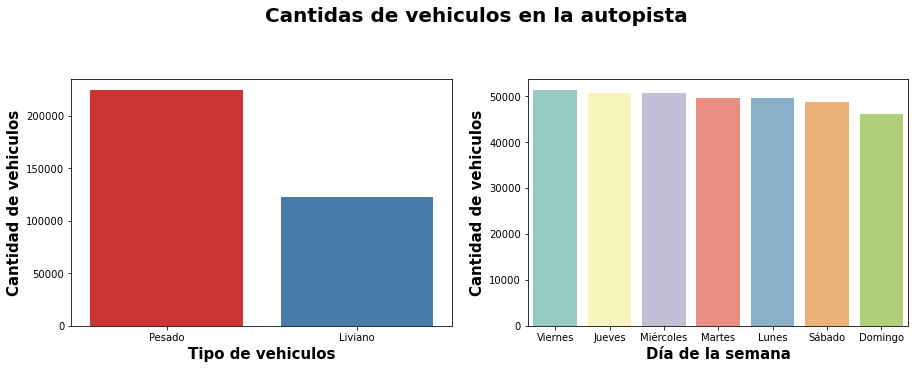

In [21]:
plt.figure(figsize=(15,10))
plt.suptitle('Cantidas de vehiculos en la autopista' , fontweight = 'black', fontsize=20)

plt.subplot(2,2,1)
sns.countplot(x='tipo_vehiculo',data = dataset,palette="Set1",order= df['tipo_vehiculo'].value_counts().index)
plt.xlabel("Tipo de vehiculos", fontweight = "black", fontsize = 15)
plt.ylabel("Cantidad de vehiculos", fontweight = "black", fontsize = 15)


plt.subplot(2,2,2)
sns.countplot(x='dia',data = dataset,palette="Set3",order= df['dia'].value_counts().index)
plt.xlabel("Día de la semana", fontweight = "black", fontsize = 15)
plt.ylabel("Cantidad de vehiculos", fontweight = "black", fontsize = 15)

Se nota que conforme avanza la semana, de igual forma incrementa la cantidad de vehiculos por día y los que mas transitan por la atopista son los vehiculos pesados.

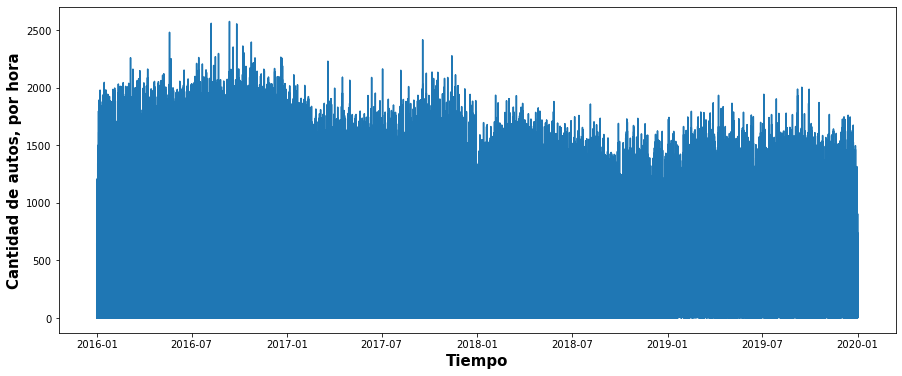

In [22]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_vehiculos)
plt.xlabel('Tiempo',fontweight = "black", fontsize = 15)
plt.ylabel('Cantidad de autos, por hora',fontweight = "black", fontsize = 15)
plt.show()

**Se emplea el método de resampleo para convertir la frecuencia de los datos y remuestreo de la serie de tiempo, con el fin de generar una distribución de muestreo única sobre el dataset, muestreando de forma Diaria los datos de series de tiempo**

In [23]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1461, 1)


cantidad_vehiculos
fecha                         
2016-01-01               25602
2016-01-02               36136
2016-01-03               37225
2016-01-04               50312
2016-01-05               49907

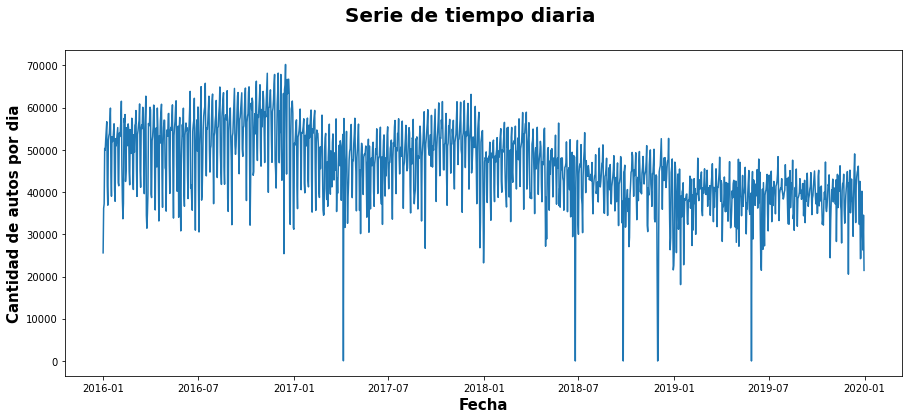

In [24]:
# Grafico serie de tiempo díaria
plt.figure(figsize = (15,6))
plt.suptitle('Serie de tiempo diaria' , fontweight = 'black', fontsize=20)
plt.plot(diario.index, diario.cantidad_vehiculos)
plt.xlabel('Fecha',fontweight = "black", fontsize = 15)
plt.ylabel('Cantidad de autos por dia',fontweight = "black", fontsize = 15)
plt.show()

Al realizar el resampleo se puede ver que la apariencia y la visualización de la grafica de serie díaria mejoran, lo que permite hacernos idea del comportamiento de la serie.

In [25]:
# Se muestra el tamaño del datset
diario.shape

(1461, 1)

In [26]:
# Datos faltantes, fecha sin la cantidad de vehiculos que pasan por la autipista
print('Datos faltantes por columna:\n', diario.isna().count(), sep = "")

Datos faltantes por columna:
cantidad_vehiculos    1461
dtype: int64


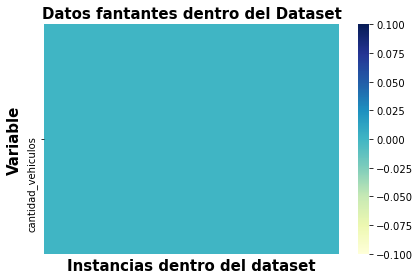

In [27]:
# Grafico para identificar valores faltantes por cada variable
Dat = diario.isnull()
heat = sns.heatmap(Dat.T,cmap='YlGnBu',xticklabels= False)
plt.title('Datos fantantes dentro del Dataset' , fontweight = 'black', fontsize=15)
plt.xlabel("Instancias dentro del dataset", fontweight = "black", fontsize = 15)
plt.ylabel("Variable", fontweight = "black", fontsize = 15)
plt.tight_layout()

Según el analísis de de los datos faltantes, se tiene que las variables no cuentan con datos faltantes de vehiculos que pasen por la autopista.

In [28]:
#Datos faltantes, donde no se tiene la fecha ni el número de vehiculos
diario.index.to_series().diff().value_counts()

1 days    1460
Name: fecha, dtype: int64

In [29]:
diario

cantidad_vehiculos
fecha                         
2016-01-01               25602
2016-01-02               36136
2016-01-03               37225
2016-01-04               50312
2016-01-05               49907
...                        ...
2019-12-27               40182
2019-12-28               30681
2019-12-29               26259
2019-12-30               34523
2019-12-31               21447

[1461 rows x 1 columns]

Según el analísis de de los datos faltantes, no hay variables que tengan datos faltantes de catidad de vehiculos y de fecha

In [4]:
# Diagrama de caja y bigotes para ver la distribución de la variable númerica
plt.figure(figsize=(20,10))
plt.suptitle('Distribución de los datos' , fontweight = 'black', fontsize=20)

plt.subplot(2,2,1)
sns.boxplot(diario.cantidad_vehiculos,palette='rainbow',orient='v')
plt.xlabel("Cantidad de vehiculos", fontweight = "black", fontsize = 15);

plt.subplot(2,2,2)
sns.distplot(diario.cantidad_vehiculos)
plt.xlabel("Cantidad de vehiculos", fontweight = "black", fontsize = 15);

NameError: name 'plt' is not defined

Con base al grafico de cajas, es posible observar que la cola de la distribución se alarga para valores inferiores a la media, portanto se tiene una asimetría negativa, con una concentración normal de los valores y hay pocos datos atípicos. 

## Detección y elimicación de outliers

Como se explico anteriormente, se encuentra pocos valores atípicos en la distribución de la serie diaria, estos valores se van a tratar de la siguiente forma:

Se emplea la regla de las tres sigma com el fin de identificar y detectar los datos atípicos. Ya cuando se indnetifiquen se procede a marcarlos con NaN para que estos no afecten la inmputación de los datos mas adelante.

In [31]:
# Con la regla de las 3 sigma, se usan 3 sigma para determinar los valores atipícos por columnas

for col in ["cantidad_vehiculos"]:
    desviacion_estandard = diario[col].std()
    media = diario[col].mean()
    outliers = (diario[col] > (media + (desviacion_estandard*3))) | (diario[col] < (media - (desviacion_estandard*3)))
    diario.loc[outliers, col] = np.nan

In [32]:
diario.describe()

cantidad_vehiculos
count         1454.000000
mean         46126.917469
std           8708.906939
min          19728.000000
25%          39751.250000
50%          45643.000000
75%          52839.500000
max          70203.000000

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


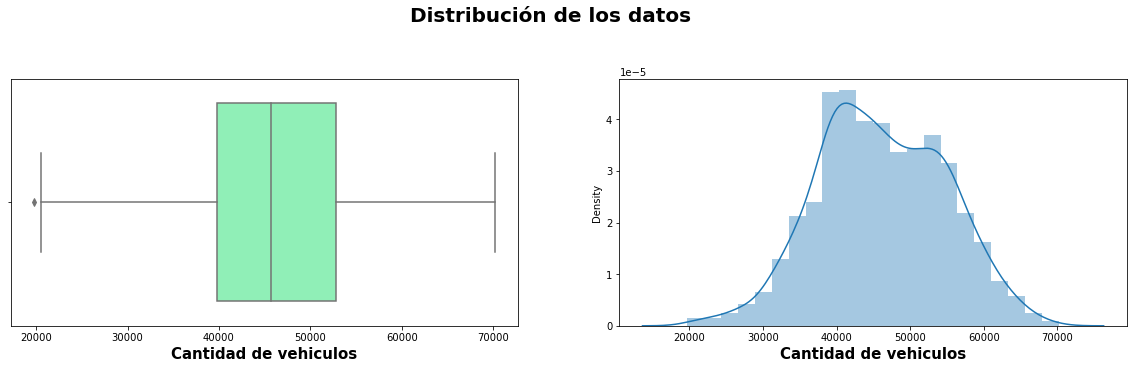

In [33]:
# Diagrama de caja y bigotes para ver la distribución de la variable númerica
plt.figure(figsize=(20,10))
plt.suptitle('Distribución de los datos' , fontweight = 'black', fontsize=20)

plt.subplot(2,2,1)
sns.boxplot(diario.cantidad_vehiculos,palette='rainbow',orient='v')
plt.xlabel("Cantidad de vehiculos", fontweight = "black", fontsize = 15);

plt.subplot(2,2,2)
sns.distplot(diario.cantidad_vehiculos)
plt.xlabel("Cantidad de vehiculos", fontweight = "black", fontsize = 15);

Al emplear la rega de las 3 sigma, se evidencia la mejoria de la distribución de los datos y se observa que hay un dato atípico, donde se procede a ver cual es dicho valor con su respactiva fecha.

In [34]:
diario_atipico = diario[diario.cantidad_vehiculos<= 20000]
diario_atipico

cantidad_vehiculos
fecha                         
2018-11-29             19728.0

In [35]:
# Se marca dicho valor atípico con nan, como se hizo anteriormente al emplear la regla de los 3 sigma
diario.cantidad_vehiculos[diario.cantidad_vehiculos<= 20000] = np.nan

## Imputación de valores faltantes

Es importante imputar los datos faltantes que se marcaron al momento de emplear la detección de outliers, donde se usa la función iterpolate para completar los valores faltantes.

In [36]:
#Imputación con la función interpolate
print(diario.isna().sum())
diario = diario.interpolate()
print(diario.isna().sum())

cantidad_vehiculos    8
dtype: int64
cantidad_vehiculos    0
dtype: int64


In [37]:
# Se valida que la serie este completa, sin datos de fechas faltantes
(diario.index == pd.date_range(start=diario.index.min(),end=diario.index.max(),freq=diario.index.freq)).all()

True

**Se emplea el método de resampleo para convertir la frecuencia de los datos y remuestreo de la serie de tiempo, con el fin de generar una distribución de muestreo única sobre el dataset, muestreando de forma Semanal, partiendo del resampleo díario que ya se empleo, el cual no tiene datos nulos y que también tiene el tratamiento de outliers de los datos de series de tiempo**

In [38]:
semanal = diario.copy()

In [39]:
semanal.reset_index(inplace=True)
semanal.head()

fecha  cantidad_vehiculos
0 2016-01-01             25602.0
1 2016-01-02             36136.0
2 2016-01-03             37225.0
3 2016-01-04             50312.0
4 2016-01-05             49907.0

In [40]:
#Resampleamos nuestros datos para agrupar por Semana
semanal = semanal.resample('W', on = 'fecha').sum()
#semanal.set_index('fecha', inplace=True)
print(semanal.shape)
semanal.head()

(210, 1)


cantidad_vehiculos
fecha                         
2016-01-03             98963.0
2016-01-10            342201.0
2016-01-17            359649.0
2016-01-24            346217.0
2016-01-31            348221.0

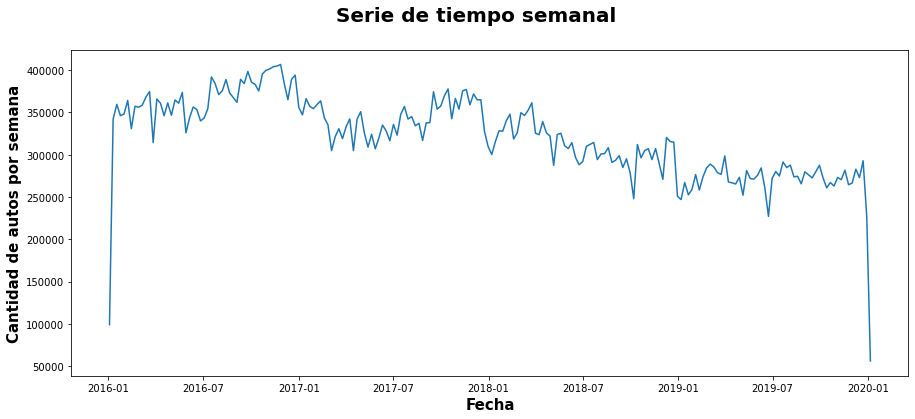

In [41]:
plt.figure(figsize = (15,6))
plt.suptitle('Serie de tiempo semanal' , fontweight = 'black', fontsize=20)
plt.plot(semanal.index, semanal.cantidad_vehiculos)
plt.xlabel('Fecha',fontweight = "black", fontsize = 15)
plt.ylabel('Cantidad de autos por semana',fontweight = "black", fontsize = 15)
plt.show()

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


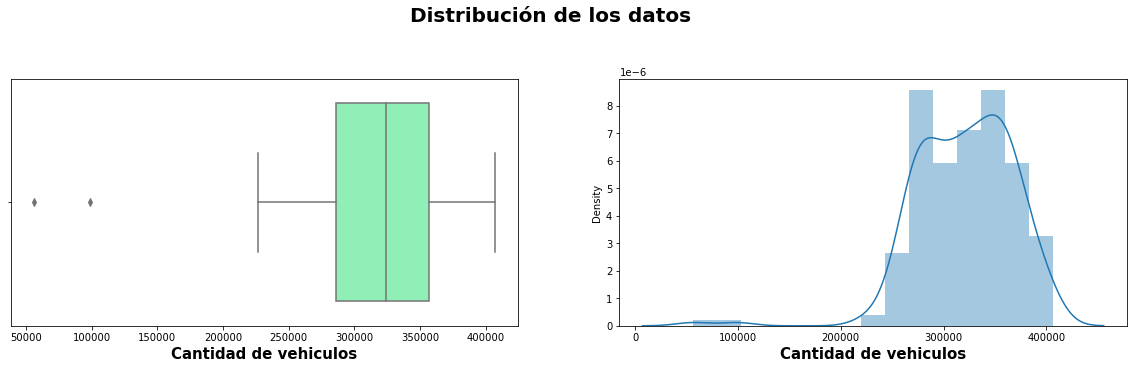

In [42]:
# Diagrama de caja y bigotes para ver la distribución de la variable númerica
plt.figure(figsize=(20,10))
plt.suptitle('Distribución de los datos' , fontweight = 'black', fontsize=20)

plt.subplot(2,2,1)
sns.boxplot(semanal.cantidad_vehiculos,palette='rainbow',orient='v')
plt.xlabel("Cantidad de vehiculos", fontweight = "black", fontsize = 15);

plt.subplot(2,2,2)
sns.distplot(semanal.cantidad_vehiculos)
plt.xlabel("Cantidad de vehiculos", fontweight = "black", fontsize = 15);

Como la serie de tiempo semanal se suman todos los datos semanalmente, su distribución se nota mucho más con asimetría negativa y pocos datos atípicos

In [43]:
#Resampleamos nuestros datos para agrupar por Mes
mensual = diario.copy()

mensual.reset_index(inplace=True)
mensual.head()

mensual = mensual.resample('M', on = 'fecha').sum()
print(mensual.shape)
mensual.head()

(48, 1)


cantidad_vehiculos
fecha                         
2016-01-31           1495251.0
2016-02-29           1462367.0
2016-03-31           1590835.0
2016-04-30           1517590.0
2016-05-31           1559386.0

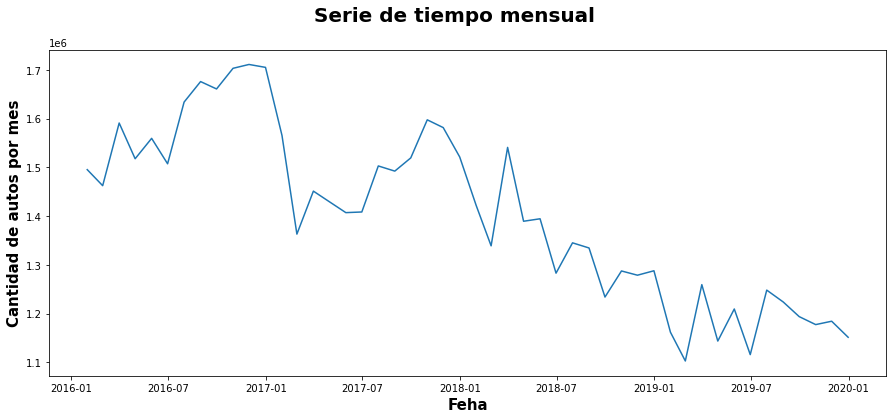

In [44]:
plt.figure(figsize = (15,6))
plt.suptitle('Serie de tiempo mensual' , fontweight = 'black', fontsize=20)
plt.plot(mensual.index, mensual.cantidad_vehiculos)
plt.xlabel('Feha',fontweight = "black", fontsize = 15)
plt.ylabel('Cantidad de autos por mes',fontweight = "black", fontsize = 15)
plt.show()

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


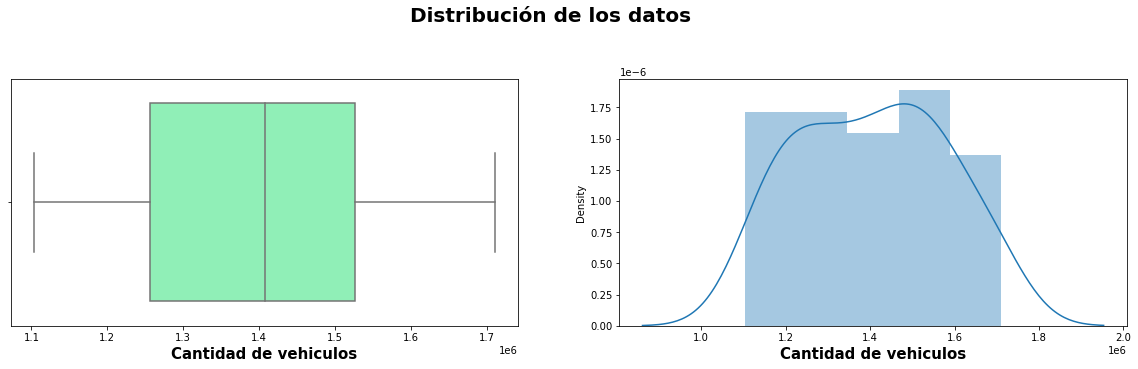

In [45]:
# Diagrama de caja y bigotes para ver la distribución de la variable númerica
plt.figure(figsize=(20,10))
plt.suptitle('Distribución de los datos' , fontweight = 'black', fontsize=20)

plt.subplot(2,2,1)
sns.boxplot(mensual.cantidad_vehiculos,palette='rainbow',orient='v')
plt.xlabel("Cantidad de vehiculos", fontweight = "black", fontsize = 15);

plt.subplot(2,2,2)
sns.distplot(mensual.cantidad_vehiculos)
plt.xlabel("Cantidad de vehiculos", fontweight = "black", fontsize = 15);

La serie de tiempo mensual tiene una perfecta distribución, ya que su asímetria es simetrica, la concentración es normal y no tiene valores atípicos. 

## Autocorrelación

La autocorrelación es la correlación de una serie consigo misma.Se calcula la correlación con la serie de tiempo original y la misma serie desfasada o corrida en el tiempo, se calcular la correlación de las observaciones de series de tiempo con observaciones con pasos de tiempo anteriores, llamados retrasos. Debido a que la correlación de las observaciones de la serie temporal se calcula con valores de la misma serie en momentos anteriores, esto se denomina correlación serial o autocorrelación.

In [46]:
# Se importa la libreria a emplear y se definen la cantidad de retrasos para la atocorrelación.
from statsmodels.tsa.stattools import acf
nlags = 52*3
autocorr = acf(semanal.cantidad_vehiculos, nlags = nlags)

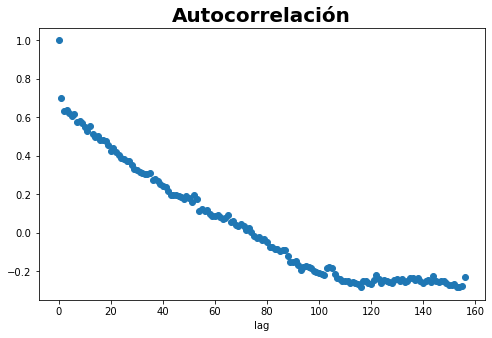

In [47]:
#Grafico de autocorrelación
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.title('Autocorrelación' , fontweight = 'black', fontsize=20)
plt.xlabel('lag');

Se muestra el valor de retraso a lo largo del eje x y la correlación en el eje y entre -1 y 1.

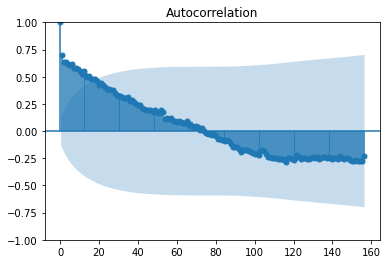

In [48]:
# Se grafican los rezagos de autocorrelación
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(semanal.cantidad_vehiculos, lags = 52*3)
plt.show()

Se imprimen todos los valores de retraso, lo que hace que la trama sea ruidosa.

## Componentes de la serie

Se emplean diferentes metodos para conocer las componetes de la serie, esto con el fin de ver tendencias, estacionalidad o patrones que pueda tener la serie de tiempo

### Media movil

El proceso de tomar una ventana, trasladarlo a lo largo de una serie de tiempo y hacer alguna operación en esa ventana se conoce como rolling window. En general, se utiliza junto con la media, pero también se podría obtener el máximo, mínimo o cualquier otro estadístico.

In [49]:
diario.describe()

cantidad_vehiculos
count         1461.000000
mean         46113.711841
std           8682.835251
min          20553.000000
25%          39721.000000
50%          45596.000000
75%          52832.000000
max          70203.000000

In [50]:
max(diario['cantidad_vehiculos'])

70203.0

In [51]:
# Media movil con ventana de 365 días
promedio_tendencia_diario = diario.cantidad_vehiculos.rolling(window=365, center = True).mean()
promedio_tendencia_diario

fecha
2016-01-01   NaN
2016-01-02   NaN
2016-01-03   NaN
2016-01-04   NaN
2016-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_vehiculos, Length: 1461, dtype: float64

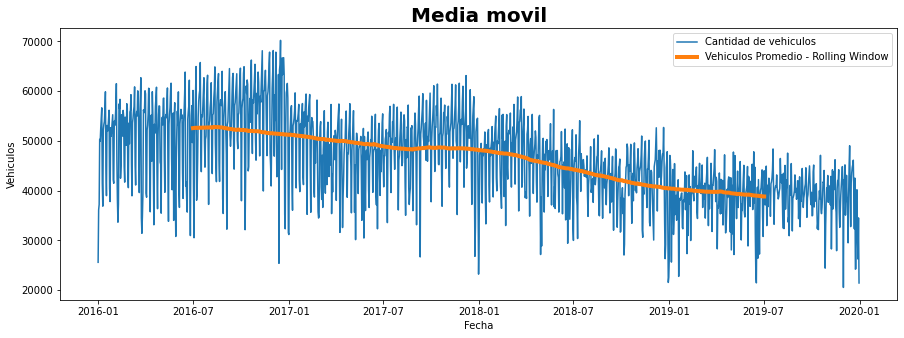

In [52]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_vehiculos, label = 'Cantidad de vehiculos')
plt.plot(promedio_tendencia_diario, lw = 4, label = 'Vehiculos Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Vehiculos')
plt.title('Media movil' , fontweight = 'black', fontsize=20)
plt.legend()
plt.show()

Se toma una ventana de tiempo suficientemente grande (365 días) y se promedia la serie sobre esa ventana. De esta forma, obtienes la tendencia. Una característica de este método es que no asume ninguna forma para la serie de tiempo.

### Tendencia Lineal

La tendencia a largo plazo de una serie de aumentar o disminuir (tendencia creciente o tendencia decreciente). Se ajusta una regresión lineal a la serie de tiempo.

In [53]:
# Se cambia la variable fecha a formato número.
diario['fecha_numeros']=diario.index.map(datetime.datetime.toordinal)
diario.head()

cantidad_vehiculos  fecha_numeros
fecha                                        
2016-01-01             25602.0         735964
2016-01-02             36136.0         735965
2016-01-03             37225.0         735966
2016-01-04             50312.0         735967
2016-01-05             49907.0         735968

In [54]:
# Se aplica una regresión lineal para sacar la tendencia.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.cantidad_vehiculos)

LinearRegression()

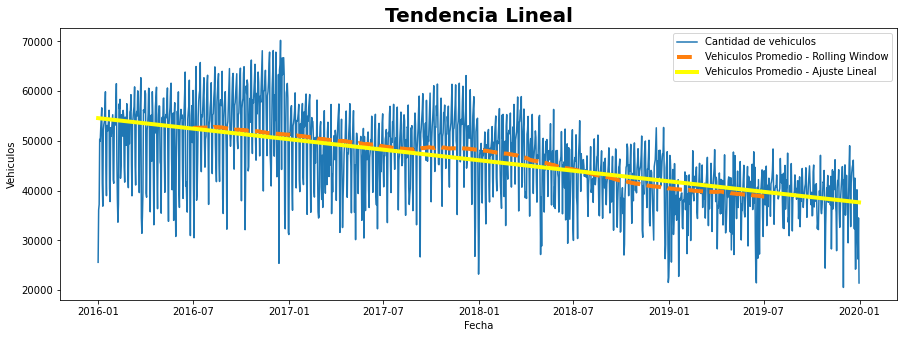

In [55]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_vehiculos, label = 'Cantidad de vehiculos')
plt.plot(promedio_tendencia_diario, ls = '--', lw = 4, label = 'Vehiculos Promedio - Rolling Window')
plt.plot(diario.index, lr.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 4,color="yellow", label = 'Vehiculos Promedio - Ajuste Lineal')
plt.xlabel('Fecha')
plt.ylabel('Vehiculos')
plt.title('Tendencia Lineal' , fontweight = 'black', fontsize=20)
plt.legend()
plt.show()

Según lo que se observa en la serie de tiempo es una tendencia a decrecer, es decir que a lo largo que pasa el tiempo son menos la cantidad de vehiculos que pasan por la autopista. 

### Otras Componentes

Se grafican otras componentes de la serie como ciclos o estacionalidad de laa serie, así como la diferencia entre la serie original y la tendencia.

In [56]:
# Se importa para sacar las demas componentes de la serie 
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_vehiculos, model='additive')

In [57]:
result.trend.head(10)

fecha
2016-01-01             NaN
2016-01-02             NaN
2016-01-03             NaN
2016-01-04    43741.142857
2016-01-05    48175.857143
2016-01-06    48934.857143
2016-01-07    48885.857143
2016-01-08    49153.571429
2016-01-09    49637.571429
2016-01-10    49836.571429
Freq: D, Name: trend, dtype: float64

In [58]:
result.seasonal

fecha
2016-01-01    5584.438737
2016-01-02   -3594.972492
2016-01-03   -8375.228578
2016-01-04    -699.775548
2016-01-05     528.946292
                 ...     
2019-12-27    5584.438737
2019-12-28   -3594.972492
2019-12-29   -8375.228578
2019-12-30    -699.775548
2019-12-31     528.946292
Freq: D, Name: seasonal, Length: 1461, dtype: float64

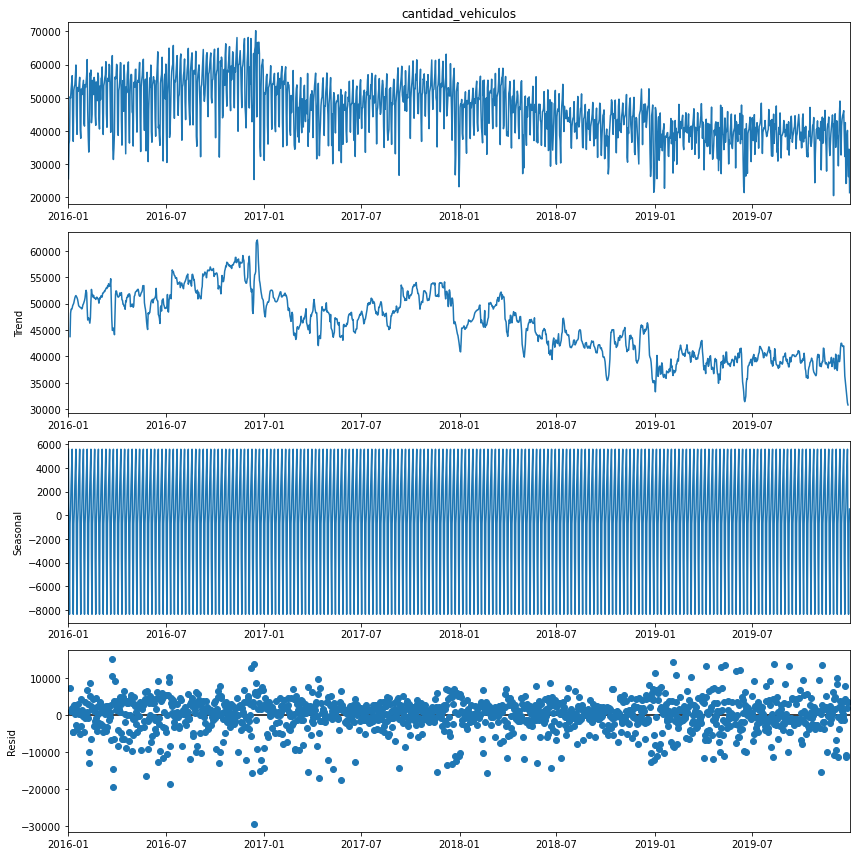

In [59]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

En esta serie de graficas se muestra la serie original, tendencia Rolling Window, diferencia entre la serie original y la tendencia.Ademas, se puede decir que la serie no tiene estacionalida per si  ciclos con, desviaciones de la tendencia debido a factores diferentes de la estacionalidad. Los ciclos por lo general se producen durante un intervalo de tiempo extenso, y los tiempos que transcurren entre los picos o valles sucesivos de los ciclo son iguales. A continuación se muentra el histograma de los residuos de la ultima grafica.

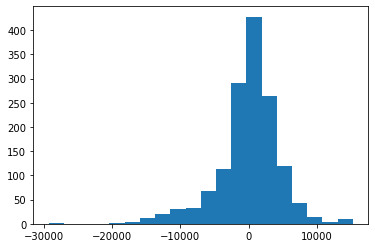

In [60]:
# Histograma. 
plt.figure(figsize = (6,4))
plt.hist(result.resid, bins = 20)
plt.show()

la cola de la distribución de los errores se alarga para valores inferiores a la media y su concentración de valores o curtosis es leptocúrtica.

# Modelo Benchmark

En este apartado se emplea un One-Step Prediction, con el fin de implementar un modelo que no es de series de tiempo donde, se entrena un `RandomForestRegressor` para predecir el tercer trimestre de la serie de tiempo diaria 

Se Utilizan 1370 día como conjunto de entrenamiento, y 90 días (3 meses) de evaluación.

In [61]:
bm = diario.cantidad_vehiculos
bm.head()

fecha
2016-01-01    25602.0
2016-01-02    36136.0
2016-01-03    37225.0
2016-01-04    50312.0
2016-01-05    49907.0
Freq: D, Name: cantidad_vehiculos, dtype: float64

En primer lugar, se definen los valores hacia atrás que se vana  tomar.

In [62]:
#Se emplean 90 días de datos para predecir el valor siguiente
look_back = 90

In [63]:
# Se crean los X e y con ceros para luego llenar con los datos
N = bm.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1370, 90) (1370,)


In [64]:
#Se llenan los X e y
for i in range(X.shape[0]):
    X[i,:] = bm.iloc[i:i+look_back]
    y[i] = bm.iloc[i+look_back]
print(X)
print(y)

[[25602. 36136. 37225. ... 56220. 55669. 56372.]
 [36136. 37225. 50312. ... 55669. 56372. 60074.]
 [37225. 50312. 49907. ... 56372. 60074. 59438.]
 ...
 [38348. 37170. 39669. ... 24349. 38168. 40182.]
 [37170. 39669. 34943. ... 38168. 40182. 30681.]
 [39669. 34943. 35054. ... 40182. 30681. 26259.]]
[60074. 59438. 39503. ... 30681. 26259. 34523.]


In [65]:
# Se hace el train/ split
N_train = 1370 - look_back # cantidad de instancias que se emplean para entrenar. 
N_test = 90 #cantidad de puntos que se usan para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(1280, 90) (1280,)
(90, 90) (90,)


In [66]:
#Entrenamiento
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state=42, n_jobs = -1).fit(X_train,y_train)

Se grafican las caracteristicas mas importantes para el modelo.

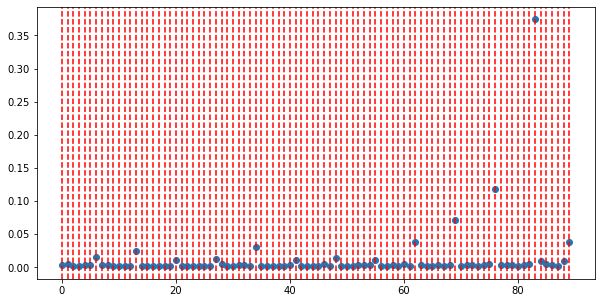

In [67]:
plt.figure(figsize = (10,5))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(90) :
    plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

In [68]:
# Predicción
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

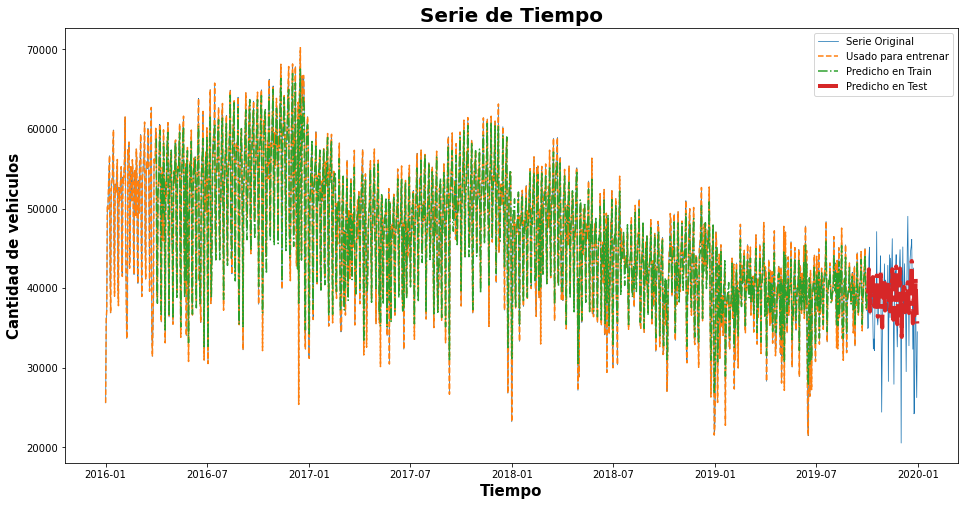

In [69]:
# grfico comparativo entre la serie original y las predicciones 
plt.figure(figsize=(16,8))
plt.plot(bm.index[:length_total], bm[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(bm.index[:N_train + look_back], bm[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(bm.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(bm.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo',fontweight = 'black', fontsize=15)
plt.ylabel('Cantidad de vehiculos',fontweight = 'black', fontsize=15)
plt.title('Serie de Tiempo' , fontweight = 'black', fontsize=20)
plt.show()

Se puede observar en la grafica que en la preduccuón del test tiene una predicción similar a la serie original sin la haber probabdo con los mejores parametros para el modelo.

In [70]:
# Función de evaluación

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Crear función para evaluar el modelo
def show_scores(X_train, X_test, y_train, y_test,modelo):
    modelo.fit(X_train, y_train)
    y_train_preds = modelo.predict(X_train)
    y_test_preds = modelo.predict(X_test)
    scores = {"Error Absoluto Medio train (MAE)": mean_absolute_error(y_train, y_train_preds),
              "Error Absoluto Medio test (MAE)": mean_absolute_error(y_test, y_test_preds),
              "Raíz del error cuadrático medio en train (RMSE)": np.sqrt(mean_squared_error(y_train, y_train_preds)),
              "Raíz del error cuadrático medio en test (RMSE)": np.sqrt(mean_squared_error(y_test, y_test_preds)),
              "Train R^2": modelo.score(X_train, y_train),
              "Test R^2": modelo.score(X_test, y_test)}
    
    return scores


show_scores(X_train, X_test, y_train, y_test,rf)

{'Error Absoluto Medio train (MAE)': 1269.879421875,
 'Error Absoluto Medio test (MAE)': 3506.075027777778,
 'Raíz del error cuadrático medio en train (RMSE)': 1816.1455927780378,
 'Raíz del error cuadrático medio en test (RMSE)': 4910.705430564199,
 'Train R^2': 0.9550792881366743,
 'Test R^2': 0.2177115946626187}

El modelo benchmark para ser un modelo de comparación y sin ser metodo de serie de tiempo tine una adecuada prediccón sin la optimización de hiperparámetros

### Optimización de hiperparámetros

In [71]:
from sklearn.model_selection import TimeSeriesSplit
ts=TimeSeriesSplit(n_splits=2)

In [72]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": [20,50,80,100,200,260,300],                      
           "max_depth": [ 3, 5, 10,15,20,30],
           #"min_samples_leaf": np.arange(1, 20, 2),
           "max_features": ["sqrt","auto","log2"]}

# Búsqueda por validación cruzada para random forest
rs_model = RandomizedSearchCV(rf,
                              param_distributions=rf_grid,
                              scoring    = 'neg_root_mean_squared_error',
                              n_iter=50,
                              cv=ts)

rs_model.fit(X_train, y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=2),
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [3, 5, 10, 15, 20, 30],
                                        'max_features': ['sqrt', 'auto',
                                                         'log2'],
                                        'n_estimators': [20, 50, 80, 100, 200,
                                                         260, 300]},
                   scoring='neg_root_mean_squared_error')

In [73]:
# Función para ver el mejor parametro para el modelo, derivado del RandomizedSearchCV
def show_parametro(model):
    print("Mejores parametros: "+str(model.best_params_))
    print("Mejor Score: "+str(model.best_score_))
    print("Metríca: "+str(model.scoring)+'\n')
    
show_parametro(rs_model)

Mejores parametros: {'n_estimators': 300, 'max_features': 'auto', 'max_depth': 20}
Mejor Score: -4662.388270351696
Metríca: neg_root_mean_squared_error



In [74]:
# Evaluación de la optimización
show_scores(X_train, X_test, y_train, y_test,rs_model) 

{'Error Absoluto Medio train (MAE)': 1647.5135183519876,
 'Error Absoluto Medio test (MAE)': 3563.67794952405,
 'Raíz del error cuadrático medio en train (RMSE)': 2183.0855956933415,
 'Raíz del error cuadrático medio en test (RMSE)': 4911.00962274066,
 'Train R^2': -2183.0855956933415,
 'Test R^2': -4911.00962274066}

In [75]:
# Modelo ideal 
rf_ideal_model = RandomForestRegressor(n_estimators=300, max_features = 'auto',max_depth = 20, n_jobs=10).fit(X_train, y_train)

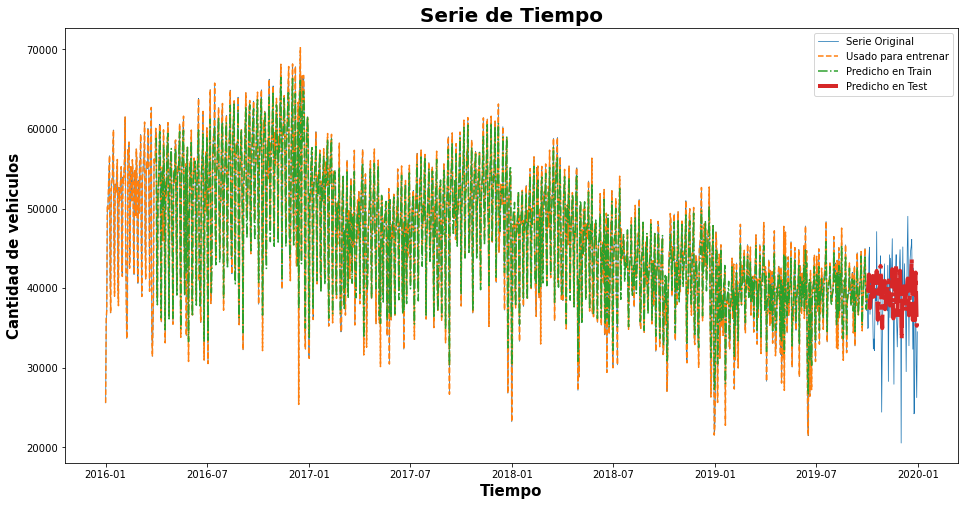

In [76]:
# Predicción modelo ideal
y_pred = rf_ideal_model.predict(X)
y_train_pred_rf = rf_ideal_model.predict(X_train)
y_test_pred_rf = rf_ideal_model.predict(X_test)

plt.figure(figsize=(16,8))
plt.plot(bm.index[:length_total], bm[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(bm.index[:N_train + look_back], bm[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(bm.index[look_back: look_back + N_train], y_train_pred_rf,'-.',label = 'Predicho en Train')
plt.plot(bm.index[N_train+look_back: length_total], y_test_pred_rf,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo',fontweight = 'black', fontsize=15)
plt.ylabel('Cantidad de vehiculos',fontweight = 'black', fontsize=15)
plt.title('Serie de Tiempo' , fontweight = 'black', fontsize=20)
plt.show()

In [77]:
show_scores(X_train, X_test, y_train, y_test,rf_ideal_model)

{'Error Absoluto Medio train (MAE)': 1265.9988165568434,
 'Error Absoluto Medio test (MAE)': 3463.425240265188,
 'Raíz del error cuadrático medio en train (RMSE)': 1792.8999080670285,
 'Raíz del error cuadrático medio en test (RMSE)': 4851.36107386811,
 'Train R^2': 0.9562218507475033,
 'Test R^2': 0.23650477643470513}

Con la optimización de hiperparámetros el modelo benchmark, mejora el rmse del test con respecto al anterior, donde se pasa de un 4910 a 4851, donde se reduce el error inicial.

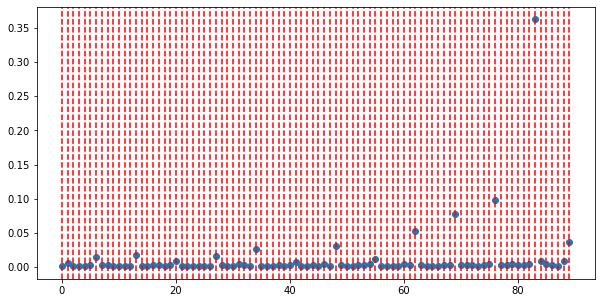

In [78]:
#Caracteristicas mas importantes del modelo
plt.figure(figsize = (10,5))
plt.scatter(np.arange(rf_ideal_model.feature_importances_.size),rf_ideal_model.feature_importances_)
for x in np.arange(90) :
    plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

En el eje y del gráfico, representa la importancia de las variables y en el eje X, los valores de los registros. Los registros que mas importancia tienen son el día 75 y el regitro del día 83 que es el mas significativo. 

In [79]:
#Predicción del tercer trimeste del 2019
predic_2019 = pd.DataFrame()
predic_2019['fecha']= bm.index[N_train+look_back:length_total]
predic_2019['y_pred_rf'] = y_test_pred_rf 
predic_2019

fecha     y_pred_rf
0  2019-10-02  39516.520572
1  2019-10-03  40472.524371
2  2019-10-04  41718.054624
3  2019-10-05  39807.979300
4  2019-10-06  37512.015742
..        ...           ...
85 2019-12-26  35980.452000
86 2019-12-27  41967.935833
87 2019-12-28  38711.524703
88 2019-12-29  35277.505556
89 2019-12-30  35856.278889

[90 rows x 2 columns]

# Modelo ARIMA

El modelo ARIMA consiste en la combinación de un término autorregresivo (AR) y un término de promedio móvil (MA) con un elemento diferenciador dado por la letra d. La palabra ARIMA (p,d,q),  (p) se refiere al orden del modelo autorregresivo; (d), al término de diferenciación, y (q), al término de media móvil con q términos de error. 

Se emplea este modelo de series de tiempo para predecir el tercer trimiestre de año 2019

## ARIMA Diario

In [80]:
diario.reset_index(inplace=True)
diario

fecha  cantidad_vehiculos  fecha_numeros
0    2016-01-01             25602.0         735964
1    2016-01-02             36136.0         735965
2    2016-01-03             37225.0         735966
3    2016-01-04             50312.0         735967
4    2016-01-05             49907.0         735968
...         ...                 ...            ...
1456 2019-12-27             40182.0         737420
1457 2019-12-28             30681.0         737421
1458 2019-12-29             26259.0         737422
1459 2019-12-30             34523.0         737423
1460 2019-12-31             21447.0         737424

[1461 rows x 3 columns]

Se define el train y el test que se va a emplear en el modelo arima diario, donde el train van a ser los valores antes del tercer trimeste del 2019 y el test los valores en adelante. 

In [81]:
train_diario= diario.loc[(diario['fecha']<'2019-10-01')]
test_diario = diario.loc[(diario['fecha']>='2019-10-01')]

**Encontrar el orden de diferenciación (d) en el modelo ARIMA**

Es importante validar si la serie es estacionaria o no estacionaria, para esto se emplea lo siguiente:

La Prueba de Dickey-Fuller permite validar si la serie de tiempo es estacionaria o no a través de la siguiente prueba de hipótesis:

H0 (Hipótesis nula): La serie no es estacionaria H1 (Hipótesis alterna): La serie es estacionaria

In [82]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(ultimos_dias):
    result=adfuller(diario.cantidad_vehiculos)
    labels = ['ADF Test Statistic','p-value','#Rezagos usados','Número de observaciones']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
      print("Se rechaza la hipótesis nula. La serie de tiempo es estacionaria")
    else:
      print("Poca evidencia en contra de la hipótesis nula. La serie de tiempo NO es estacionaria")

print(adfuller_test(diario))

ADF Test Statistic : -1.2558185311145598
p-value : 0.6491353882756499
#Rezagos usados : 20
Número de observaciones : 1440
Poca evidencia en contra de la hipótesis nula. La serie de tiempo NO es estacionaria
None


Dado que la serie es no estacionaria, porque el valor P es mayor al nivel de significancia se deberá probar distintos ordenes de diferenciación hasta encontrar un p-valor significativo en la prueba de Dickey-Fuller.

In [83]:
# Diferenciación para convertirla estacionaria
diff_diario = diario.diff(periods=1)

In [84]:
diff_diario = diff_diario[1:]
diff_diario.head()

fecha  cantidad_vehiculos  fecha_numeros
1 1 days             10534.0            1.0
2 1 days              1089.0            1.0
3 1 days             13087.0            1.0
4 1 days              -405.0            1.0
5 1 days              2585.0            1.0

In [85]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(ultimos_dias):
    result=adfuller(diff_diario.cantidad_vehiculos)
    labels = ['ADF Test Statistic','p-value','#Rezagos usados','Número de observaciones']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
      print("Se rechaza la hipótesis nula. La serie de tiempo es estacionaria")
    else:
      print("Poca evidencia en contra de la hipótesis nula. La serie de tiempo NO es estacionaria")

print(adfuller_test(diff_diario))

ADF Test Statistic : -15.260104549811974
p-value : 4.874091564982541e-28
#Rezagos usados : 19
Número de observaciones : 1440
Se rechaza la hipótesis nula. La serie de tiempo es estacionaria
None


**Encontrar el orden del término AR (p)**


Es posible definir el número requerido de términos AR revisando el gráfico de Autocorrelación parcial (PACF).

La autocorrelación parcial se puede imaginar como la correlación entre la serie y su rezago, después de excluir las contribuciones de los rezagos intermedios. Entonces, PACF transmite la correlación pura entre un retraso y la serie. De esa manera,se sabrá si ese retraso es necesario en el plazo de AR o no.

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


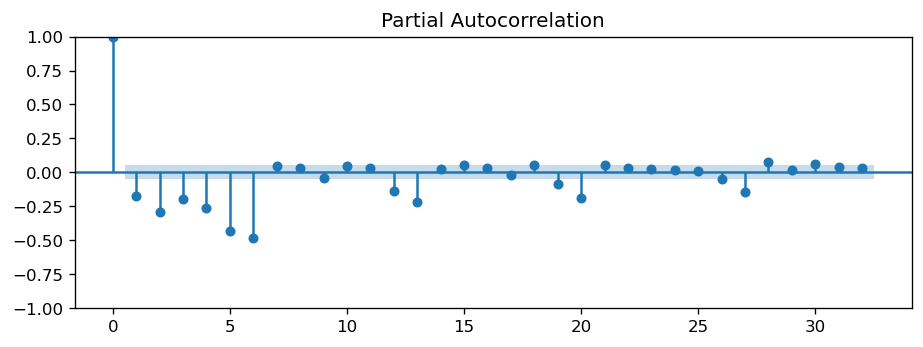

In [86]:
# Autocorrelación parcial
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

plot_pacf(diff_diario.cantidad_vehiculos)
plt.show();

Segun el gráfico es posible apreciar que desde el primer rezago es significativo, debido a que se encuentra por encima de la región de significacia(parte azul). Por esto se es posible decir que el orden del termino AR(p) es de 6

**Encontrar el orden del término MA (q)**

De la misma forma que observamos el gráfico PACF para el número de términos AR, podemos mirar el gráfico ACF para el número de términos MA.

El ACF indica cuántos términos MA se requieren para eliminar cualquier autocorrelación en la serie estacionarizada.

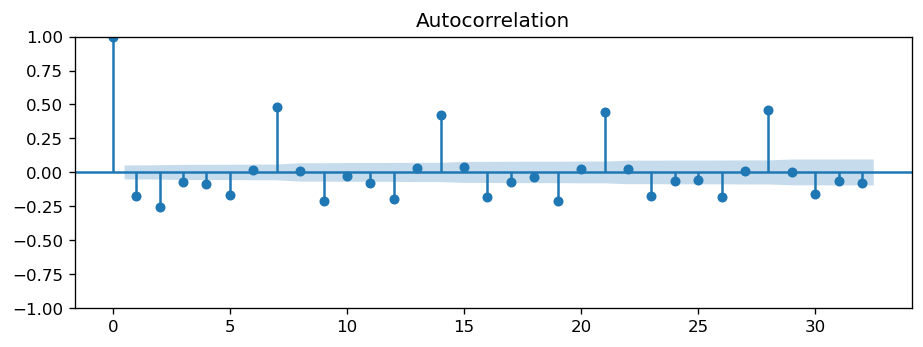

In [87]:
#Orden MA
plot_acf(diff_diario.cantidad_vehiculos)
plt.show()

Se puede observar en el gráfico que el termino MA(q) toma un valor de 2

**Construcción del Modelo ARIMA**

Una vez se encuentran los ordenes que se rquieren, se crea el modelo ARIMA

In [88]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(diario.cantidad_vehiculos, order=(6,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     cantidad_vehiculos   No. Observations:                 1461
Model:                 ARIMA(6, 1, 0)   Log Likelihood              -14674.360
Date:                Sat, 15 Jan 2022   AIC                          29362.719
Time:                        19:36:03   BIC                          29399.723
Sample:                             0   HQIC                         29376.523
                               - 1461                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6555      0.016    -40.470      0.000      -0.687      -0.624
ar.L2         -0.7430      0.018    -40.340      0.000      -0.779      -0.707
ar.L3         -0.6764      0.019    -35.217      0.0

Se puede apreciar que todos los rezagos del primer ysegundo parametro son significativo ya que estan por debajo de 0.05 en el P > z

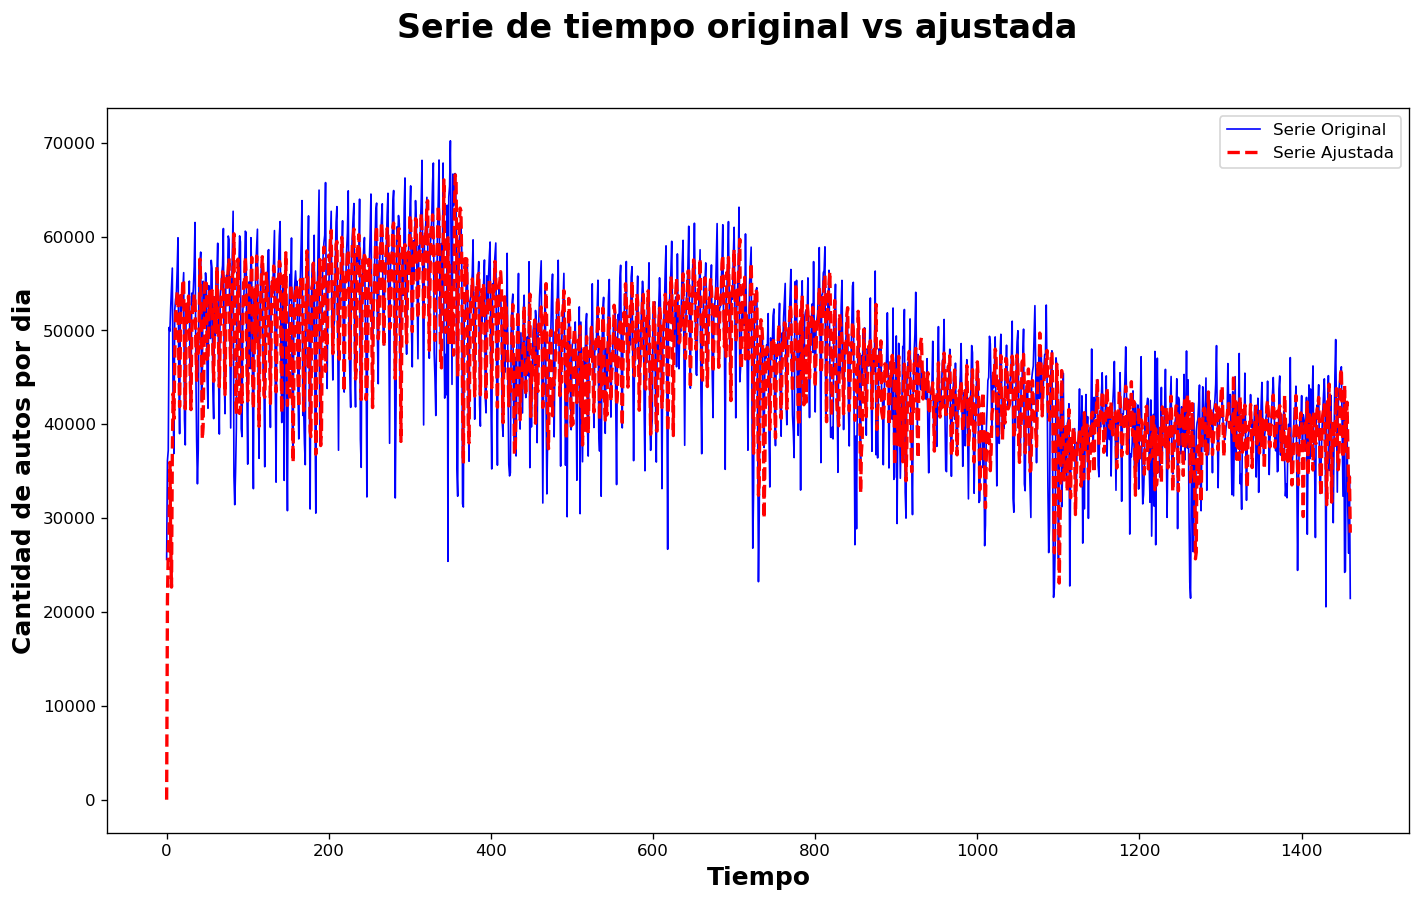

In [89]:
# Serie orginal vs la predicción
plt.figure(figsize=(14,8))
plt.suptitle('Serie de tiempo original vs ajustada' , fontweight = 'black', fontsize=20)
plt.plot(diario.index, diario.cantidad_vehiculos,lw = 1,color="blue", label = 'Serie Original')
plt.plot(diario.index, model_fit.predict(),'--',lw = 2,color="red", label = 'Serie Ajustada')
plt.xlabel('Tiempo',fontweight = "black", fontsize = 15)
plt.ylabel('Cantidad de autos por dia',fontweight = "black", fontsize = 15)
plt.legend()
plt.show();

Es posible ver que la serie que se predice tiene un buen ajuste con respecto a la serie original.

**Se pronostica**

In [90]:
fc = model_fit.forecast(92,alpha=0.05)

In [91]:
len(test_diario.cantidad_vehiculos)

92

In [92]:
y_pred_diario = fc
y_true_diario = test_diario.cantidad_vehiculos
RMSE = np.sqrt(mean_squared_error(y_true_diario,y_pred_diario))
print(f'RMSE de ARIMA Diario: {RMSE}')

RMSE de ARIMA Diario: 9798.254498690334


Al comparar el error del test del  modelo benchmark con respecto al modelo arima diario, este ultimo tiene un error mayor al del modelo benchmark, cabe resaltar que el RandomForestRegressor que se empleo en el modelo benchmark original de predicción de series de tiempo, donde lo que hace es una predicción uno a uno.

## ARIMA Semanal

In [93]:
semanal.reset_index(inplace=True)
semanal

fecha  cantidad_vehiculos
0   2016-01-03             98963.0
1   2016-01-10            342201.0
2   2016-01-17            359649.0
3   2016-01-24            346217.0
4   2016-01-31            348221.0
..         ...                 ...
205 2019-12-08            282891.0
206 2019-12-15            272960.0
207 2019-12-22            292881.0
208 2019-12-29            226390.0
209 2020-01-05             55970.0

[210 rows x 2 columns]

In [94]:
# Se define el train y el test para el modelo
train_semanal = semanal.loc[(semanal['fecha']<'2019-10-01')]
test_semanal = semanal.loc[(semanal['fecha']>='2019-10-01')]

In [95]:
# Se establece el ordel del diferencial
diff_semanal = semanal.diff(periods=1)

In [96]:
diff_semanal = diff_semanal[1:]
diff_semanal.head()

fecha  cantidad_vehiculos
1 7 days            243238.0
2 7 days             17448.0
3 7 days            -13432.0
4 7 days              2004.0
5 7 days             16050.0

**Encontrar el orden de diferenciación (d) en el modelo ARIMA**

In [97]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(ultimas_semanas):
    result=adfuller(diff_semanal.cantidad_vehiculos)
    labels = ['ADF Test Statistic','p-value','#Rezagos usados','Número de observaciones']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
      print("Se rechaza la hipótesis nula. La serie de tiempo es estacionaria")
    else:
      print("Poca evidencia en contra de la hipótesis nula. La serie de tiempo NO es estacionaria")

print(adfuller_test(diff_semanal))

ADF Test Statistic : -12.108835846014632
p-value : 1.9405001976379436e-22
#Rezagos usados : 1
Número de observaciones : 207
Se rechaza la hipótesis nula. La serie de tiempo es estacionaria
None


**Encontrar el orden del término AR (p)**


C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


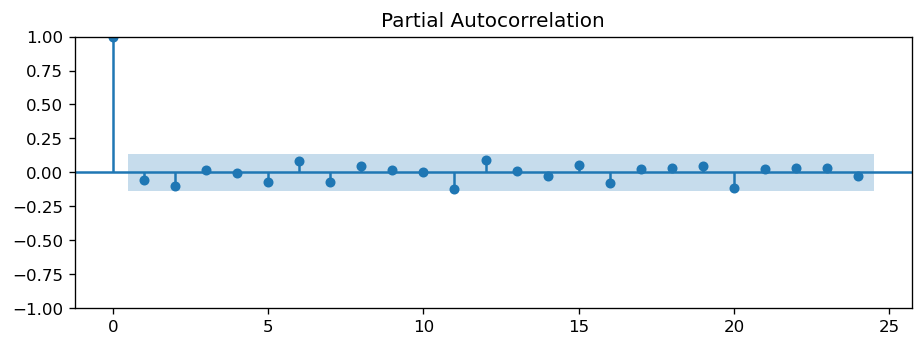

In [98]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

plot_pacf(diff_semanal.cantidad_vehiculos)
plt.show();

Como los rezagos encuentran por debajo de la región de significacia(parte azul), se concluye que que el orden del termino AR(p) es de 0

**Encontrar el orden del término MA (q)**

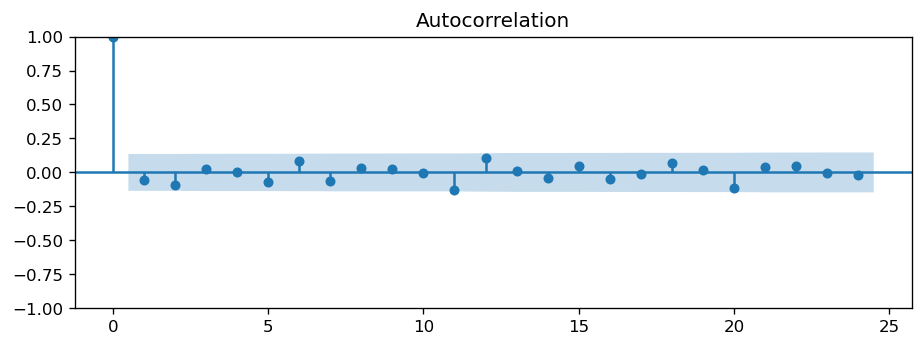

In [99]:
plot_acf(diff_semanal.cantidad_vehiculos)
plt.show()

Como los rezagos encuentran por debajo de la región de significacia(parte azul), se concluye que que el orden del termino MA(q) es de 0

**Construcción del Modelo ARIMA**

Una vez se encuentran los ordenes que se rquieren, se crea el modelo ARIMA Semanal

In [100]:
from statsmodels.tsa.arima.model import ARIMA

model_semanal = ARIMA(semanal.cantidad_vehiculos, order=(0,1,0))
model_fit_semanal = model_semanal.fit()
print(model_fit_semanal.summary())

                               SARIMAX Results                                
Dep. Variable:     cantidad_vehiculos   No. Observations:                  210
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2435.881
Date:                Sat, 15 Jan 2022   AIC                           4873.763
Time:                        19:36:25   BIC                           4877.105
Sample:                             0   HQIC                          4875.114
                                - 210                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.741e+08   1.82e+07     42.554      0.000    7.38e+08     8.1e+08
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):              9276.33
Prob(Q):                              0.44   Pr

Se puede apreciar que el unico rezago del parametro que tiene el modelo semanal es significativo, ya que estan por debajo de 0.05 en el P > z

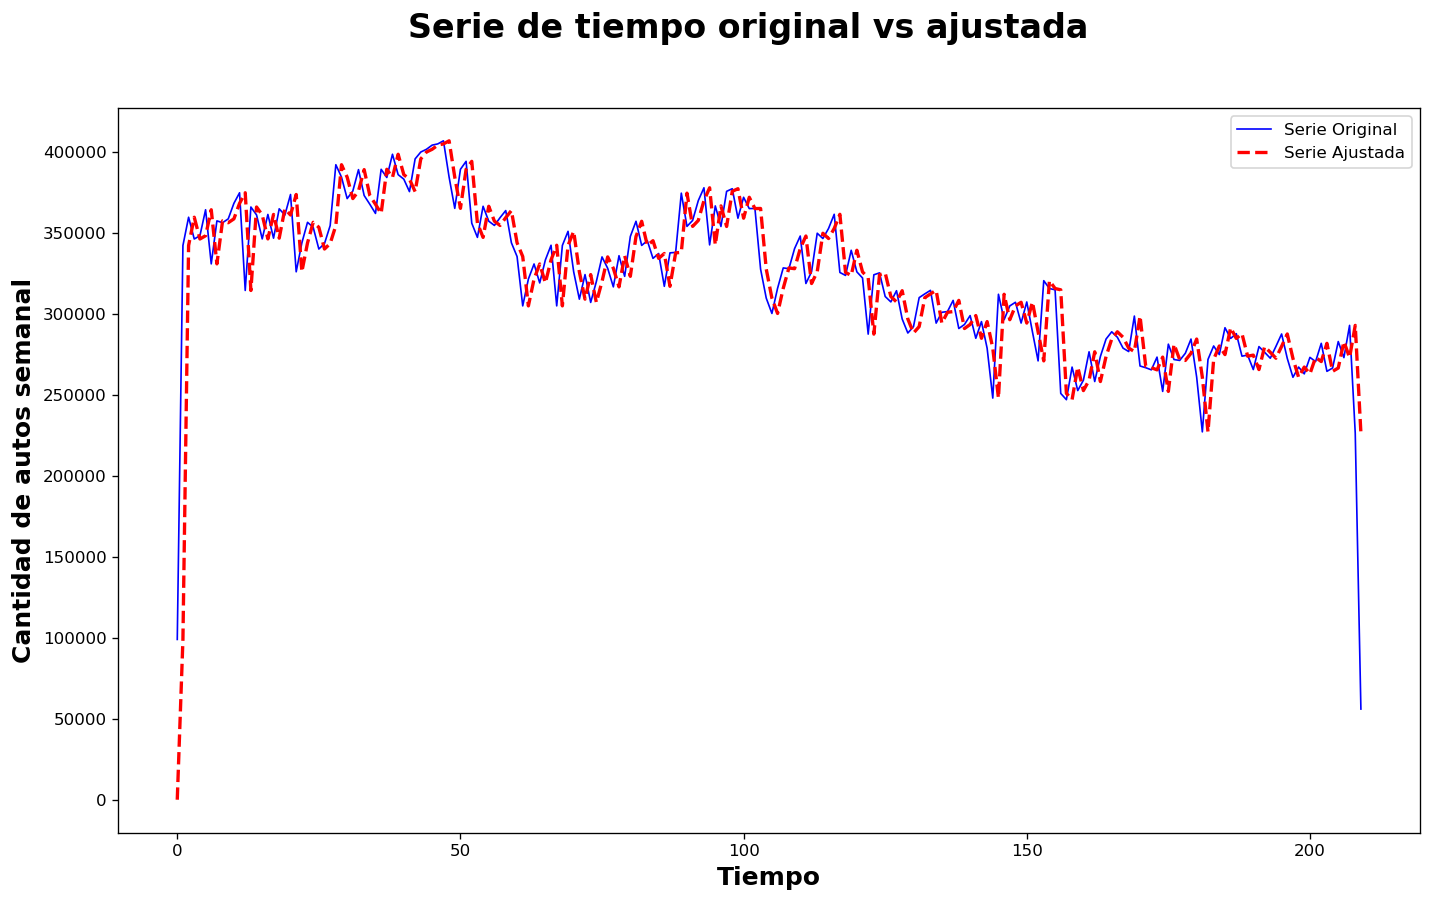

In [101]:
# Serie original vs predicción
plt.figure(figsize=(14,8))
plt.suptitle('Serie de tiempo original vs ajustada' , fontweight = 'black', fontsize=20)
plt.plot(semanal.index, semanal.cantidad_vehiculos,lw = 1,color="blue", label = 'Serie Original')
plt.plot(semanal.index, model_fit_semanal.predict(),'--',lw = 2,color="red", label = 'Serie Ajustada')
plt.xlabel('Tiempo',fontweight = "black", fontsize = 15)
plt.ylabel('Cantidad de autos semanal',fontweight = "black", fontsize = 15)
plt.legend()
plt.show();

La predicción del modelo semanal presenta un buen ajuste con respecto a la serie semanal original.

In [102]:
fc_semanal = model_fit_semanal.forecast(14,alpha=0.05)

In [103]:
len(test_semanal.cantidad_vehiculos)

14

In [104]:
y_pred_semanal = fc_semanal
y_true_semanal = test_semanal.cantidad_vehiculos
RMSE = np.sqrt(mean_squared_error(y_true_semanal,y_pred_semanal))
print(f'RMSE de ARIMA Semanal: {RMSE}')

RMSE de ARIMA Semanal: 205644.58167673662


Para el modelo semanal el error en test aumenta considerablemente con respecto al modelo benchmark y al modelo ARIMA diario, esto se debe a que en el modelo semanal los datos se encunentran sumados por semanas y esto implica una disminución en la enfectividad de la predicción del modelo, por dicha razón se incrementa el error del modelo ARIMA semanal

# Auto ARIMA

La función auto_arima() proporciona una opción rápida para construir pronósticos con series temporales, debido a que evalúa entre todos los posibles modelos, al mejor modelo(menor AIC) considerando diversos criterios: estacionariedad, estacionalidad, diferencias, entre otras.

## Auto ARIMA Diario

In [105]:
import pmdarima as pm

In [106]:
model_auto_diario = pm.auto_arima(diario.cantidad_vehiculos, start_p=1, start_q=1,
                      max_p=10, max_q=10, # maximum p and q
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True)
print(model_auto_diario.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=29865.968, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=30359.234, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30318.141, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=29982.056, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=30357.235, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=29782.771, Time=0.60 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=30192.318, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=29764.763, Time=1.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=30139.307, Time=0.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=29679.507, Time=0.55 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=30038.032, Time=0.28 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=29528.442, Time=0.63 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=29751.326, Time=0.35 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=29365.966, Time=1.27 sec
 ARIMA(6,1,0)(0,0,0

Se puede observar que el mejor modelo ARIMA es el que tiene orden (10,1,4), lo cual indica que es el que tiene menor AIC = 29227.853

In [107]:
model_auto_diario.fit(train_diario.cantidad_vehiculos)

ARIMA(order=(10, 1, 4), scoring_args={}, suppress_warnings=True)

In [108]:
#train y test del modelo
train_diario.set_index('fecha', inplace=True)
test_diario.set_index('fecha', inplace=True)

In [109]:
#Predicción
pred_adiario = model_auto_diario.predict(n_periods=92,return_conf_int=False)
predic_audiario = pd.Series(data=pred_adiario,index=test_diario.cantidad_vehiculos.index)
predic_audiario

fecha
2019-10-01    38713.221893
2019-10-02    39815.587824
2019-10-03    41605.008091
2019-10-04    42946.704160
2019-10-05    40778.644253
                  ...     
2019-12-27    39058.646359
2019-12-28    38620.696031
2019-12-29    37949.856522
2019-12-30    38635.910861
2019-12-31    38958.885579
Length: 92, dtype: float64

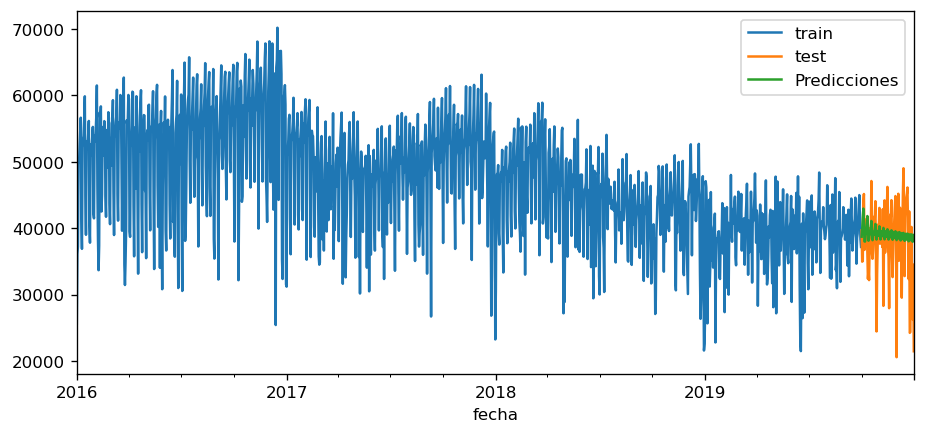

In [110]:
fig, ax = plt.subplots(figsize=(9,4))
train_diario.cantidad_vehiculos.plot(ax = ax, label='train')
test_diario.cantidad_vehiculos.plot(ax = ax, label='test')
predic_audiario.plot(ax = ax, label='Predicciones')
ax.legend();

Segun la gráfica las predicciones no se ajustan muy bien a los datos de test, donde captura muy poco, es importante ver el error, para comparar con ARIMA diario que se empleo antes de encontrar el mejor modelo.

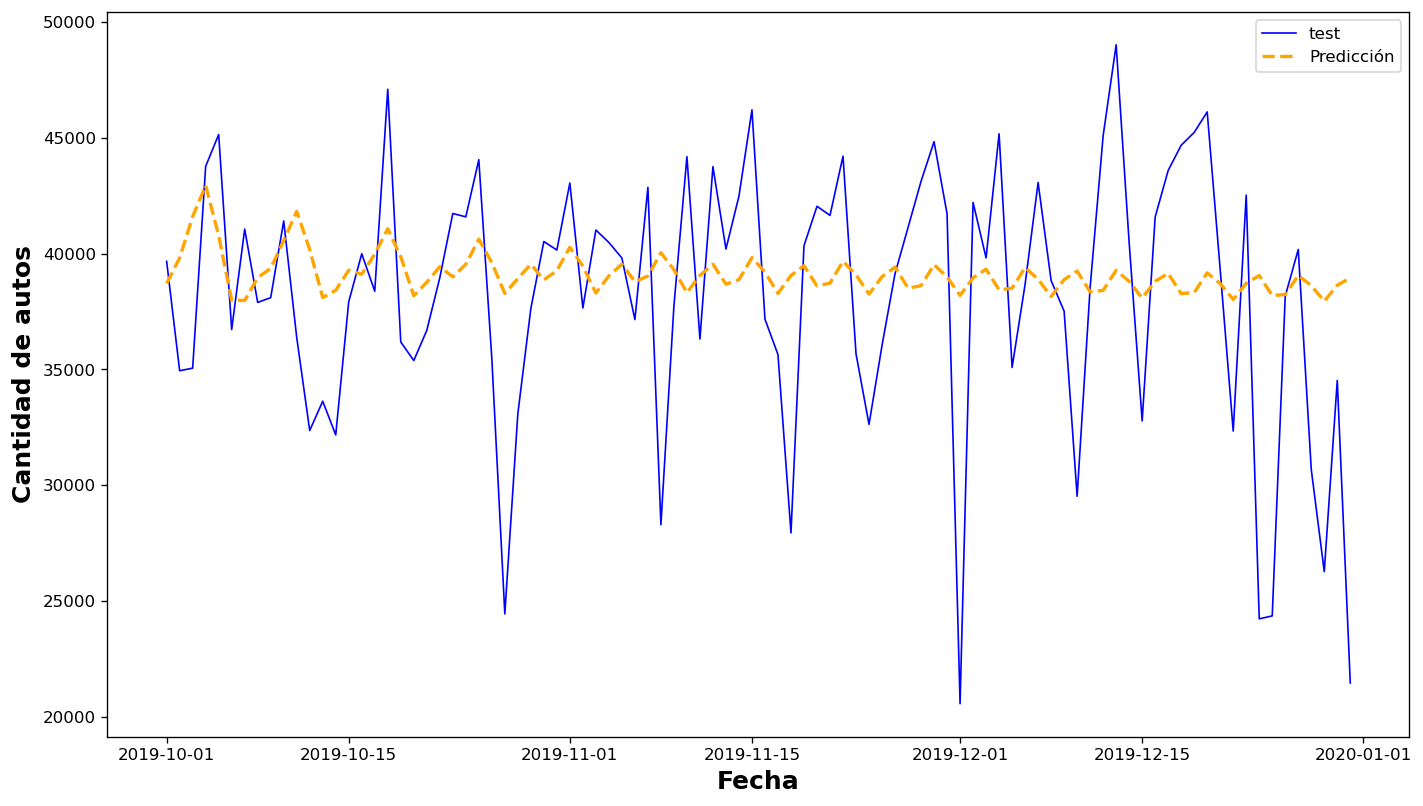

In [111]:
plt.figure(figsize=(14,8))
#plt.suptitle('Serie de tiempo original vs ajustada' , fontweight = 'black', fontsize=20)
plt.plot(test_diario.cantidad_vehiculos,lw = 1,color="blue", label = 'test')
plt.plot(predic_audiario,'--',lw = 2,color="orange", label = 'Predicción')
plt.xlabel('Fecha',fontweight = "black", fontsize = 15)
plt.ylabel('Cantidad de autos',fontweight = "black", fontsize = 15)
plt.legend()
plt.show();

In [112]:
y_pred_autodiario = predic_audiario
y_true_autodiario = test_diario.cantidad_vehiculos
RMSE = np.sqrt(mean_squared_error(y_true_autodiario,y_pred_autodiario))
print(f'RMSE de Auto ARIMA Diario: {RMSE}')

RMSE de Auto ARIMA Diario: 5703.790033201011


Al comparar el error del AUTO-ARIMA con respeto al ARIMA, se puede decir que se tuvo una mejoria al utilizar la función auto_arima para encontar los ordenes que configuran el mejor modelo, ya que el RMSE, para la serie diaria paso de un 9798 que se tenia en el ARIMA, a un 5703 para el Auto ARIMA.

## Auto ARIMA Semanal

In [113]:
model_auto_semanal = pm.auto_arima(semanal.cantidad_vehiculos, start_p=1, start_q=1,
                      max_p=10, max_q=10, # maximum p and q
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True)
print(model_auto_semanal.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4905.225, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4875.749, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4900.344, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4902.080, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4873.763, Time=0.00 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.172 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  210
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2435.881
Date:                Sat, 15 Jan 2022   AIC                           4873.763
Time:                        19:39:23   BIC                           4877.105
Sample:                             0   HQIC                          4875.114
                                - 210                                       

Se puede observar que el mejor modelo ARIMA es el que tiene orden (0,1,0) lo cual indica que es el que tiene menor AIC = 4873.763

In [114]:
model_auto_semanal.fit(train_semanal.cantidad_vehiculos)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [115]:
#train y test del modelo semanal
train_semanal.set_index('fecha', inplace=True)
test_semanal.set_index('fecha', inplace=True)

In [116]:
#Predicción
pred_asemanal = model_auto_semanal.predict(n_periods=14,return_conf_int=False)
predic_asemanal = pd.Series(data=pred_asemanal,index=test_semanal.cantidad_vehiculos.index)
predic_asemanal

fecha
2019-10-06    287568.0
2019-10-13    287568.0
2019-10-20    287568.0
2019-10-27    287568.0
2019-11-03    287568.0
2019-11-10    287568.0
2019-11-17    287568.0
2019-11-24    287568.0
2019-12-01    287568.0
2019-12-08    287568.0
2019-12-15    287568.0
2019-12-22    287568.0
2019-12-29    287568.0
2020-01-05    287568.0
dtype: float64

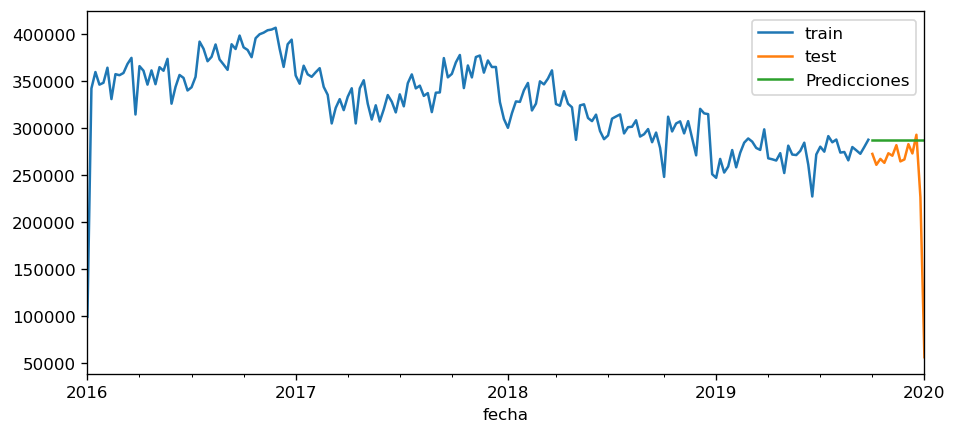

In [117]:
fig, ax = plt.subplots(figsize=(9,4))
train_semanal.cantidad_vehiculos.plot(ax = ax, label='train')
test_semanal.cantidad_vehiculos.plot(ax = ax, label='test')
predic_asemanal.plot(ax = ax, label='Predicciones')
ax.legend();

La predicción no tiene una gran captura de los datos 

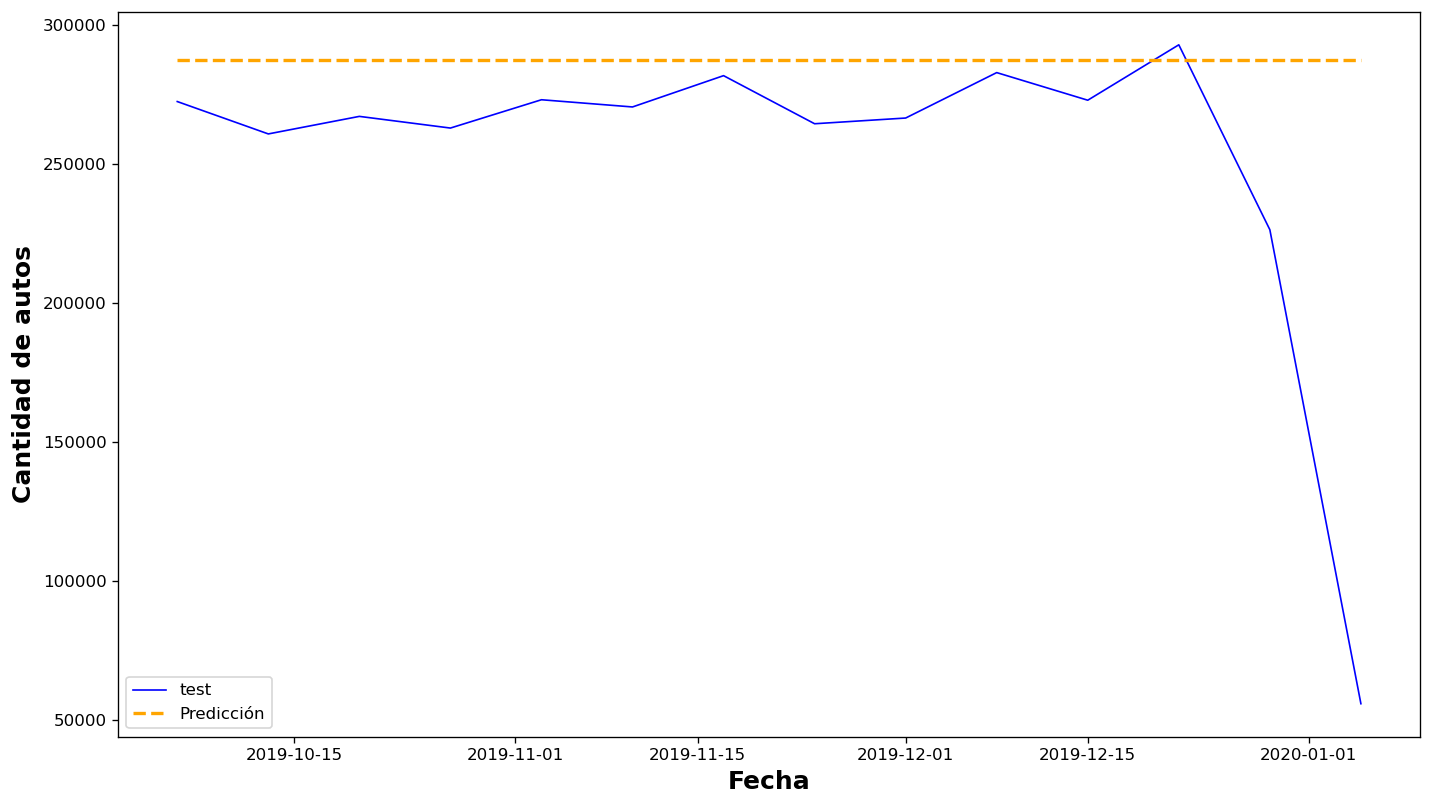

In [118]:
plt.figure(figsize=(14,8))
#plt.suptitle('Serie de tiempo original vs ajustada' , fontweight = 'black', fontsize=20)
plt.plot(test_semanal.cantidad_vehiculos,lw = 1,color="blue", label = 'test')
plt.plot(predic_asemanal,'--',lw = 2,color="orange", label = 'Predicción')
plt.xlabel('Fecha',fontweight = "black", fontsize = 15)
plt.ylabel('Cantidad de autos',fontweight = "black", fontsize = 15)
plt.legend()
plt.show();

In [119]:
y_pred_asemanal = predic_asemanal
y_true_asemanal = test_semanal.cantidad_vehiculos
RMSE = np.sqrt(mean_squared_error(y_true_asemanal,y_pred_asemanal))
print(f'RMSE de Auto ARIMA Semanal: {RMSE}')

RMSE de Auto ARIMA Semanal: 66070.59073769941


Al comparar el error del ARIMA semanal inicial, con el AUTO-ARIMA se puede apreciar una gran reduccón del RMSE, donde se paso de un 205644 a 66070 empleando el AUTO-ARIMA

# Prophet

Prophet es un procedimiento de previsión de datos de series temporales basado en un modelo aditivo en el que las tendencias no lineales se ajustan a la estacionalidad anual, semanal y diaria. Funciona mejor con series temporales que tienen fuertes efectos estacionales y varias temporadas de datos históricos. Prophet es resistente a los datos que faltan y a los cambios de tendencia, y suele manejar bien los valores atípicos. Este proceso esta compuesto por dos columnas "ds" e "y", donde la columna "ds" contiene los valores de las fechas con su respectivo formato, el campo "y" contine los datos a pronosticar.


In [120]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [121]:
diario.reset_index(inplace=True,drop=False)
diario

index      fecha  cantidad_vehiculos  fecha_numeros
0         0 2016-01-01             25602.0         735964
1         1 2016-01-02             36136.0         735965
2         2 2016-01-03             37225.0         735966
3         3 2016-01-04             50312.0         735967
4         4 2016-01-05             49907.0         735968
...     ...        ...                 ...            ...
1456   1456 2019-12-27             40182.0         737420
1457   1457 2019-12-28             30681.0         737421
1458   1458 2019-12-29             26259.0         737422
1459   1459 2019-12-30             34523.0         737423
1460   1460 2019-12-31             21447.0         737424

[1461 rows x 4 columns]

In [122]:
df_prophet = pd.DataFrame({'ds':diario.fecha, 'y':diario.cantidad_vehiculos})
df_prophet.head()

ds        y
0 2016-01-01  25602.0
1 2016-01-02  36136.0
2 2016-01-03  37225.0
3 2016-01-04  50312.0
4 2016-01-05  49907.0

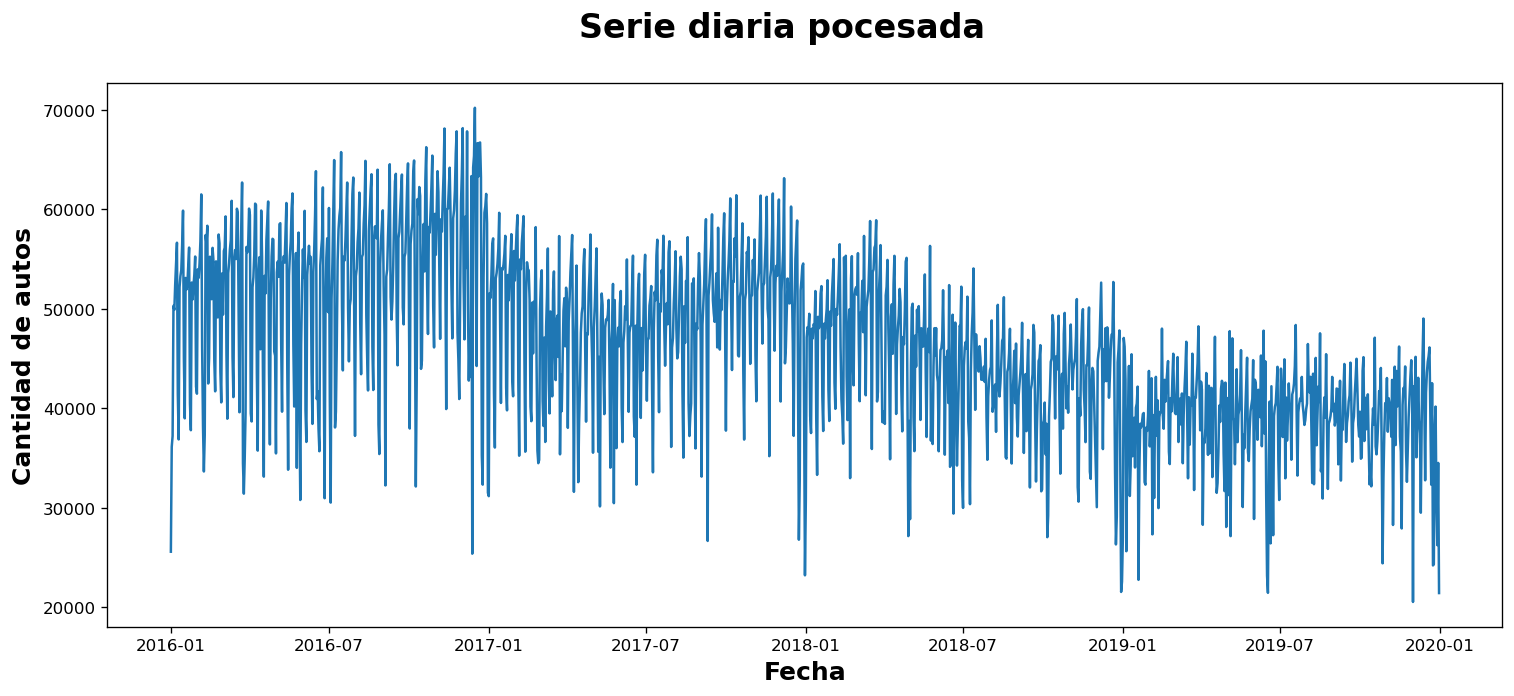

In [123]:
#Graficamos nuestros datos, tal como quedaron procesados
plt.figure(figsize = (15,6))
plt.suptitle('Serie diaria pocesada' , fontweight = 'black', fontsize=20)
plt.plot(df_prophet.ds, df_prophet.y)
plt.xlabel('Fecha',fontweight = "black", fontsize = 15)
plt.ylabel('Cantidad de autos',fontweight = "black", fontsize = 15)
plt.show()

In [124]:
# Se corta el dataset hasta el año  de septiembre 2019, para poder predecir el siguiente trimestre
split_date = '2019-09-30'
df_prophet1 = df_prophet.loc[df_prophet.ds <= split_date]
df_prophet1                            

ds        y
0    2016-01-01  25602.0
1    2016-01-02  36136.0
2    2016-01-03  37225.0
3    2016-01-04  50312.0
4    2016-01-05  49907.0
...         ...      ...
1364 2019-09-26  43110.0
1365 2019-09-27  44985.0
1366 2019-09-28  41925.0
1367 2019-09-29  38348.0
1368 2019-09-30  37170.0

[1369 rows x 2 columns]

In [125]:
# Se crea el modelo prophet
modelo = Prophet(weekly_seasonality=True,daily_seasonality=True)
modelo.fit(df_prophet1 )

In [126]:
# Dataframe donde se colocan el periodo a predecir, es decir el tercer trimestrecon 365 días
future = modelo.make_future_dataframe(periods=90)

In [127]:
print(future.head())
print(future.tail())

          ds
0 2016-01-01
1 2016-01-02
2 2016-01-03
3 2016-01-04
4 2016-01-05
             ds
1454 2019-12-25
1455 2019-12-26
1456 2019-12-27
1457 2019-12-28
1458 2019-12-29


In [128]:
#Predicción del tercertrimestre del 2019
forecast = modelo.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(8)

ds          yhat    yhat_lower    yhat_upper
1451 2019-12-22  30957.338933  24468.737773  37523.640390
1452 2019-12-23  38464.807759  32156.182644  45770.657950
1453 2019-12-24  39348.606100  33056.015655  46290.898091
1454 2019-12-25  40972.828471  34489.354732  47862.738522
1455 2019-12-26  42082.863435  35605.655764  48160.334564
1456 2019-12-27  43082.280319  36157.920588  49583.992317
1457 2019-12-28  33320.022554  27282.198525  39450.938092
1458 2019-12-29  28219.720192  21893.375576  34484.910450

Se guardan las predicciones en el forescast, (ds) fecha de la predicción, (yhat) valor predicho, (yhat_lower) y (yhat_upper) limites inferior y superior, los cuales proporcionan la incertidumbre del proceso

In [129]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

<Figure size 1800x600 with 0 Axes>

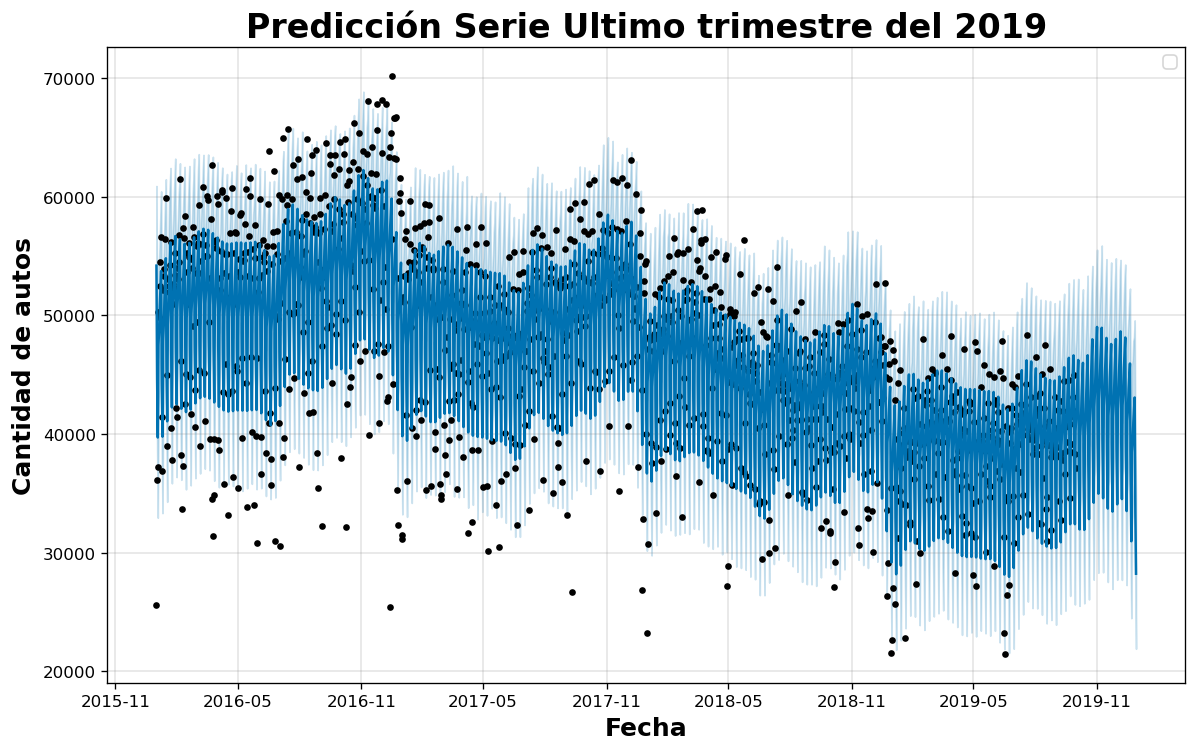

In [130]:
#gráfico de la predicción
plt.figure(figsize = (15,5))
fig = modelo.plot(forecast)
plt.title('Predicción Serie Ultimo trimestre del 2019' , fontweight = 'black', fontsize=20)
plt.xlabel('Fecha',fontweight = "black", fontsize = 15)
plt.ylabel('Cantidad de autos',fontweight = "black", fontsize = 15)
plt.legend()
plt.show();

En el gráfico de las predcciones del tercer trimestre del 2019 se puede ver que la linea azul esta conformada por los valores de las predicciones y los puntos negros son los valores reales, se puede ver los valores de la predicción se ajuntan de buena forma a los datos originales, pese a que hay  outliers

ERROR:prophet.plot:Importing plotly failed. Interactive plots will not work.


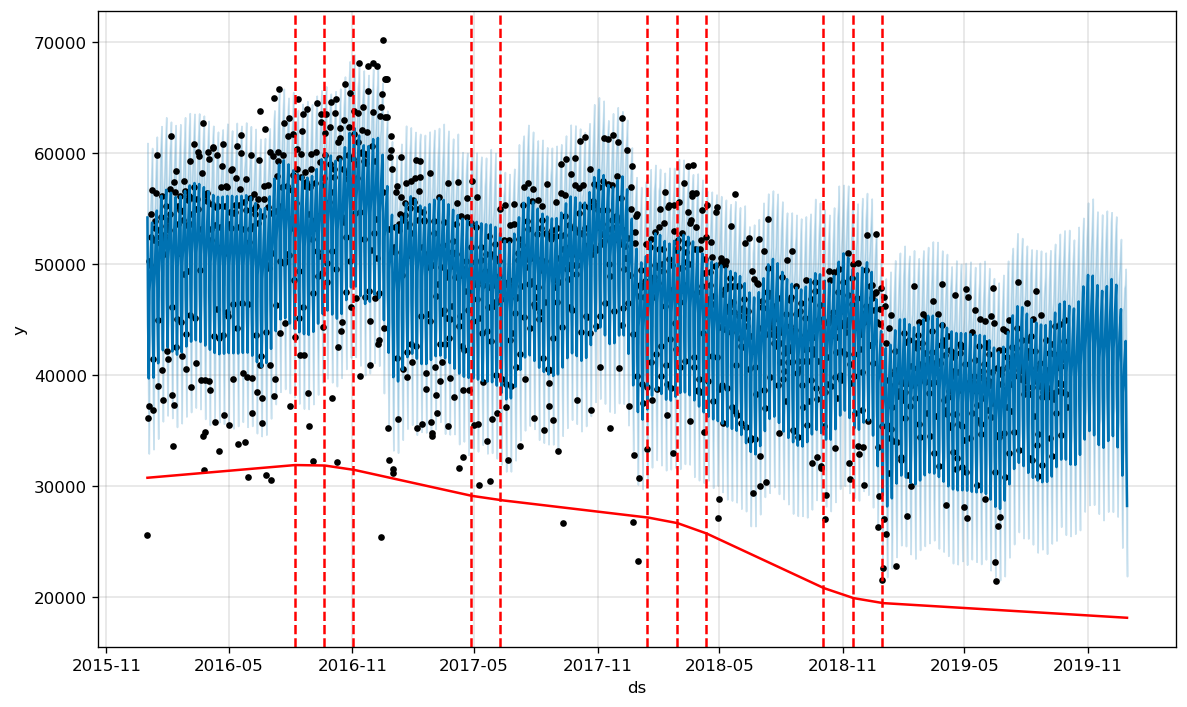

In [131]:
from prophet.plot import add_changepoints_to_plot
fig = modelo.plot(forecast)
tendencia = add_changepoints_to_plot(fig.gca(),modelo,forecast)

En el grafico de tendencia se puede ver cuando se dio algun cambio en la tendencia de la cantidad de vheiculos que pasan por la autopista, dado por las lineas punteadas

In [132]:
#Predicción
y_pred = forecast[['ds','yhat']].loc[forecast.ds < split_date]
y_true = df_prophet1[['ds','y']].loc[df_prophet1.ds < split_date]

In [133]:
RMSE = np.sqrt(mean_squared_error(y_true['y'], y_pred['yhat']))
print('RMSE Prophet:',RMSE)

RMSE Prophet: 4995.435389054547


Al emplear el modelo prophet se mejora el RMSE en comparación de los modelos ARIMA y AUTO-ARIMA, ya que con respecto a estos dos ultimos modelos el error se redujo, presentando mejores predicciones.

# Conclusiones

* Se puede concluir que el mejor modelo obtenido es el Prophet, este modelo fue el que obtivo mejores resultados y su RMSE es el más bajo, pese a que el modelo benchmarck presento un menor error que el Prophet, es un buen modelo para tener nociones, prero que a diferencia del prophet,no es un modelo para series de tiempo, ya que realiza la predicción por cada uno de los valores y es necesario tener el rango del periodo al que se va a predecir, dicho de otra forma, si se emplea el modelo benchmark para predecir el periodo 2020, no seria el modelo mas adecuado,porque se requiere tener la información del año 2020 para poder predeci. Es por esto que se elige el prophet como el mejor modelo y el que se emplearía para predecir el año 2020,ya que obtuvo mejores resultados que el ARIMA Diario y el AUTO-ARIMA Diario que son modelos de series de tiempo.


* Aunque Prophet es resistente a los datos que faltan,  se pueden agregar fechas de días festivos y en los que la autopista estuvo cerrada, para explorar si se mejora la metrica del modelo y se puede emplear para predecir otros periodos

In [134]:
resumen_proyect = {"Modelo":["Prophet", "AUTO-ARIMA Diario", "ARIMA Diario", "Benchmark"], 
           "RMSE":["~4995", "~5703", "~9798", "~4851"]}
pd.DataFrame(resumen_proyect)

Modelo   RMSE
0            Prophet  ~4995
1  AUTO-ARIMA Diario  ~5703
2       ARIMA Diario  ~9798
3          Benchmark  ~4851

# Para pensar, investigar y, opcionalmente, implementar

## ¿Si se inncorpora información de los días festivos, días de paro nacional y en los que la autopista estuvo cerrada, mejoran los resultados para predecir el periodo 2020?

**Flujo de trabajo:**

* Buscar los días festivos, paros nacionales y días en los que la atopista estuvo cerrada.
* Crear un DataFrame con estas fechas.
* Agregar al modelo Prhophet creado anteiormente dichas fechas. 
* Sacar la descomposicón de la serie. 
* Comparar el error obtenido con el anterior modelo
* Evaluar con validación cruzada


In [135]:
#Crear dataframe con los días festivos 
holidays = pd.DataFrame({
  'holiday': 'feriado_y_cierres',
  'ds': pd.to_datetime(['2016-01-01', '2016-02-08', '2016-02-09', '2016-03-24', '2016-03-25', '2016-04-02', '2016-05-01',
                        '2016-05-25', '2016-06-20', '2016-07-09', '2016-08-15', '2016-12-08', '2016-12-25', '2017-01-01',
                        '2017-02-27', '2017-02-28', '2017-03-24', '2017-04-02', '2017-04-06', '2017-04-14', '2017-05-01',
                        '2017-05-25', '2017-06-20', '2017-07-09', '2017-08-21', '2017-12-08', '2017-12-18', '2017-12-19',
                        '2017-12-25', '2018-01-01', '2018-02-12', '2018-02-13', '2018-03-24', '2018-03-30', '2018-04-02',
                        '2018-05-01', '2018-05-25', '2018-06-20', '2018-06-25', '2018-07-09', '2018-08-20', '2018-09-25',
                        '2018-11-29', '2018-11-30', '2018-12-01', '2018-12-08', '2018-12-25', '2019-01-01', '2019-03-04',
                        '2019-03-05', '2019-03-24', '2019-04-02', '2019-04-19', '2019-05-01', '2019-05-25', '2019-05-29',
                        '2019-06-20', '2019-07-09', '2019-08-19', '2019-09-14', '2019-12-08', '2019-12-25']),
  'lower_window': 0,
  'upper_window': 1,
})



In [136]:
holidays

holiday         ds  lower_window  upper_window
0   feriado_y_cierres 2016-01-01             0             1
1   feriado_y_cierres 2016-02-08             0             1
2   feriado_y_cierres 2016-02-09             0             1
3   feriado_y_cierres 2016-03-24             0             1
4   feriado_y_cierres 2016-03-25             0             1
..                ...        ...           ...           ...
57  feriado_y_cierres 2019-07-09             0             1
58  feriado_y_cierres 2019-08-19             0             1
59  feriado_y_cierres 2019-09-14             0             1
60  feriado_y_cierres 2019-12-08             0             1
61  feriado_y_cierres 2019-12-25             0             1

[62 rows x 4 columns]

In [137]:
# Se corta el dataset hasta el año 2019, para poder predecir el siguiente año 2020
split_date2 = '2019-12-31'
df_prophet2 = df_prophet.loc[df_prophet.ds <= split_date2]
df_prophet2 

ds        y
0    2016-01-01  25602.0
1    2016-01-02  36136.0
2    2016-01-03  37225.0
3    2016-01-04  50312.0
4    2016-01-05  49907.0
...         ...      ...
1456 2019-12-27  40182.0
1457 2019-12-28  30681.0
1458 2019-12-29  26259.0
1459 2019-12-30  34523.0
1460 2019-12-31  21447.0

[1461 rows x 2 columns]

In [138]:
#Crear modelo con las fechas insertadas
# Se crea el modelo prophet
modelo2 = Prophet(weekly_seasonality=True,daily_seasonality=True,holidays = holidays)
modelo2.fit(df_prophet2)

In [139]:
# Dataframe donde se colocan el periodo a predecir, es decir el 2020 con 365 días
future2 = modelo2.make_future_dataframe(periods=365)

In [140]:
print(future2.head())
print(future2.tail())

          ds
0 2016-01-01
1 2016-01-02
2 2016-01-03
3 2016-01-04
4 2016-01-05
             ds
1821 2020-12-26
1822 2020-12-27
1823 2020-12-28
1824 2020-12-29
1825 2020-12-30


In [141]:
forecast2 = modelo2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(8)

ds          yhat    yhat_lower    yhat_upper
1818 2020-12-23  35462.944846  29081.426076  42887.878715
1819 2020-12-24  36539.254650  30347.836484  42943.920921
1820 2020-12-25  37652.470541  31795.983729  44326.041610
1821 2020-12-26  28057.310827  21730.127352  34488.405471
1822 2020-12-27  22891.171347  16490.384425  29194.267214
1823 2020-12-28  30601.802933  24087.134179  37385.217559
1824 2020-12-29  31295.315027  25344.906374  38393.805757
1825 2020-12-30  32660.445090  26360.781315  39432.401452

In [142]:
forecast2.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'feriado_y_cierres',
       'feriado_y_cierres_lower', 'feriado_y_cierres_upper', 'holidays',
       'holidays_lower', 'holidays_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

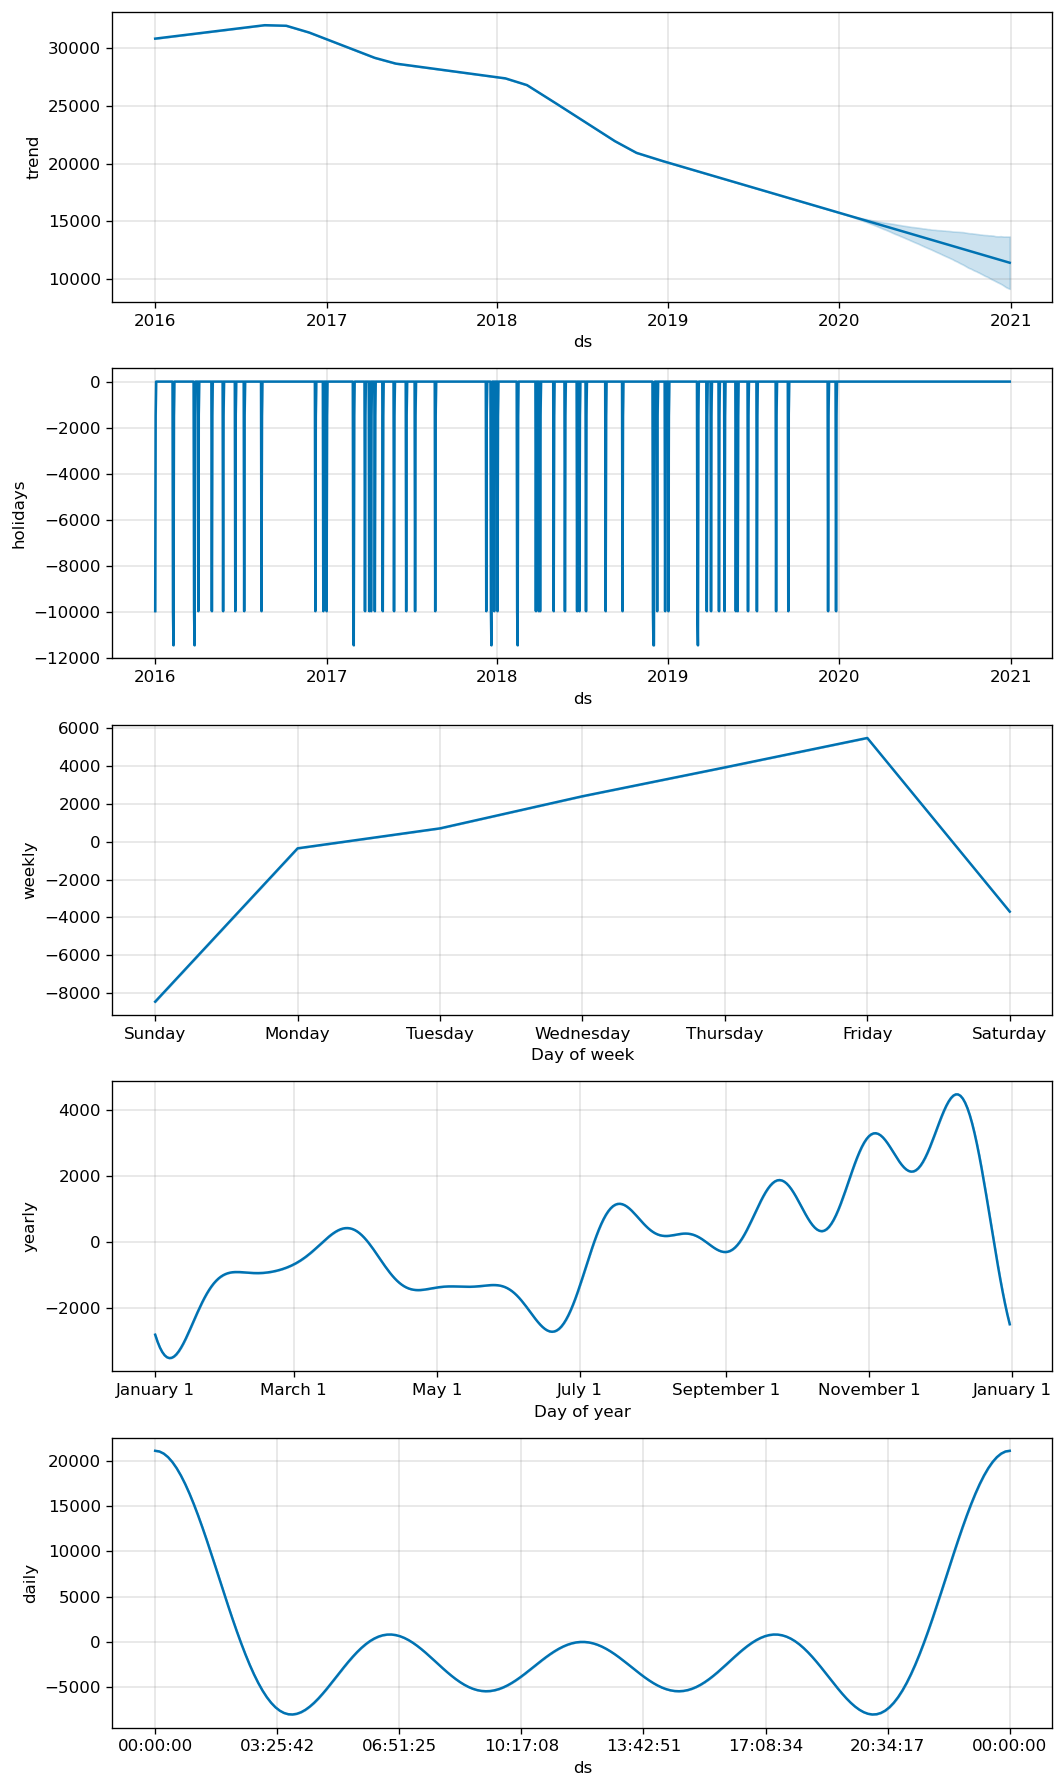

In [143]:
a = modelo2.plot_components(forecast2)

In [146]:
y_pred2 = forecast2[['ds','yhat']].loc[forecast2.ds < split_date2]
y_true2 = df_prophet2[['ds','y']].loc[df_prophet2.ds < split_date2]

In [147]:
RMSE_NEW = np.sqrt(mean_squared_error(y_true2['y'], y_pred2['yhat']))
print('RMSE Prophet:',RMSE_NEW)

RMSE Prophet: 4610.76230544357


Al incorporar los días festivos,días de paro nacional y en los que la autopista estuvo cerrada, se nota una mejoria con respecto al modelo que no tenia dichas in corporaciones, lo que permitio pasar de un 4995 a 4610, lo que implica que al moento de predecir es importante tener encuenta este tipo defehas en los modelos.

### Evaluación con validación cruzada

Se emplean con 730 en inicial, con lo que se va a entrenar, en el horizonte se dejan 180 días los cuales van a ser el test y en el periodo de 365 se va a mover para hacer la validación.

In [148]:
from fbprophet.diagnostics import cross_validation

cv = cross_validation(modelo2,initial = '730 days', period = '365 days', horizon = '180 days')
cv

INFO:fbprophet:Making 2 forecasts with cutoffs between 2018-07-04 00:00:00 and 2019-07-04 00:00:00


ds          yhat    yhat_lower    yhat_upper        y     cutoff
0   2018-07-05  51270.873174  46172.946055  56650.166698  46014.0 2018-07-04
1   2018-07-06  52793.616607  47459.025018  58198.916279  51226.0 2018-07-04
2   2018-07-07  41580.568167  36598.912388  46802.138186  38678.0 2018-07-04
3   2018-07-08  36076.115617  30861.669593  41390.048491  37028.0 2018-07-04
4   2018-07-09  34207.623421  28593.051599  39159.486554  30377.0 2018-07-04
..         ...           ...           ...           ...      ...        ...
355 2019-12-27  44140.681529  38400.877739  49707.637879  40182.0 2019-07-04
356 2019-12-28  33741.494249  28143.757426  39786.541192  30681.0 2019-07-04
357 2019-12-29  28426.988843  22632.988383  34162.727417  26259.0 2019-07-04
358 2019-12-30  37063.557269  31423.559294  42868.052653  34523.0 2019-07-04
359 2019-12-31  37906.520852  32091.365521  43920.578593  21447.0 2019-07-04

[360 rows x 6 columns]

In [149]:
#Metricas
from fbprophet.diagnostics import performance_metrics
mtric = performance_metrics(cv)
mtric

horizon           mse         rmse          mae      mape     mdape  \
0    18 days  1.787710e+07  4228.132066  3371.814454  0.080594  0.064254   
1    19 days  1.754470e+07  4188.639922  3292.709930  0.078823  0.063902   
2    20 days  1.619687e+07  4024.533741  3220.411789  0.077655  0.063902   
3    21 days  1.770397e+07  4207.608567  3375.013519  0.080507  0.063902   
4    22 days  2.119589e+07  4603.899582  3685.544837  0.087631  0.064254   
..       ...           ...          ...          ...       ...       ...   
158 176 days  5.747582e+07  7581.281023  5462.360951  0.153783  0.100788   
159 177 days  5.094612e+07  7137.655101  5098.350201  0.141503  0.099135   
160 178 days  4.743567e+07  6887.355517  4826.007584  0.136311  0.091723   
161 179 days  5.159393e+07  7182.891256  5018.236142  0.150842  0.091723   
162 180 days  6.953502e+07  8338.766221  5740.924833  0.192326  0.099135   

     coverage  
0    0.833333  
1    0.833333  
2    0.833333  
3    0.805556  
4    0.777778  
..        ...  
158  0.555556  
159  0.583333  
160  0.611111  
161  0.611111  
162  0.583333  

[163 rows x 7 columns]

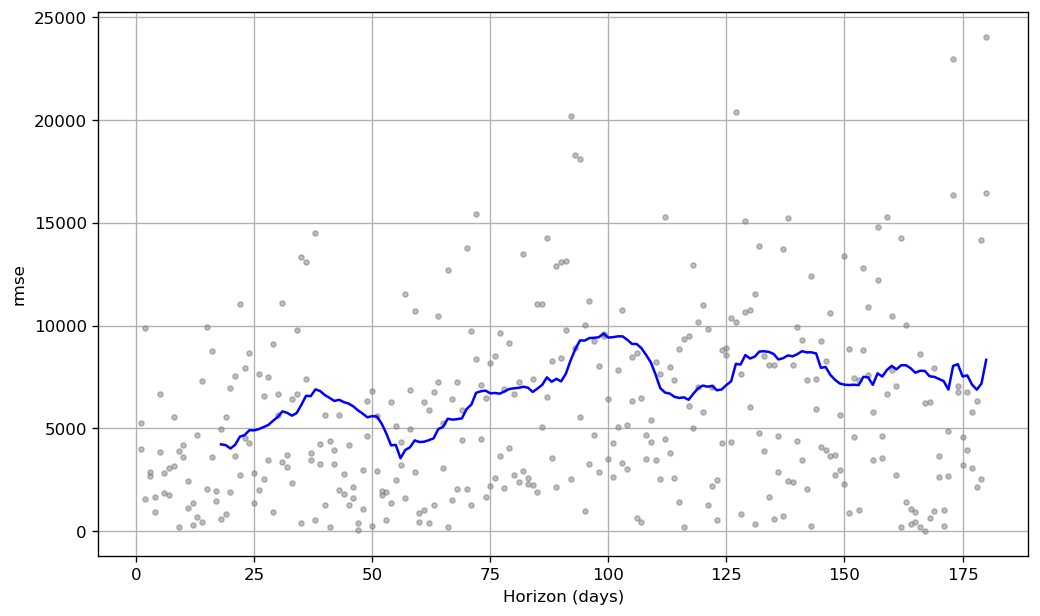

In [150]:
from fbprophet.plot import plot_cross_validation_metric
plot_metric = plot_cross_validation_metric(cv,metric = "rmse")
plot_metric.savefig("output.png")

## ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran para predecir el año 2020?

**Flujo de trabajo:**

* Seleccionar la variable a incorporar.
* Hacer Encoding.
* Buscar una función para adicionar las nuevas vaiables dummis. 
* Incorporar la nueva variable regresora 
* Evaualr

In [151]:
dataset_2= dataset.copy()
dataset_2

dia    sentido tipo_vehiculo  cantidad_vehiculos  \
0       Viernes     Centro       Liviano                  14   
1       Viernes     Centro        Pesado                   3   
2       Viernes  Provincia       Liviano                  66   
3       Viernes  Provincia        Pesado                   1   
4       Viernes  Provincia        Pesado                   4   
...         ...        ...           ...                 ...   
346561   Martes  Provincia       Liviano                 556   
346562   Martes  Provincia        Pesado                   1   
346563   Martes     Centro       Liviano                 580   
346564   Martes     Centro       Liviano                 214   
346565   Martes  Provincia       Liviano                 190   

                     fecha  
0      2016-01-01 00:00:00  
1      2016-01-01 00:00:00  
2      2016-01-01 00:00:00  
3      2016-01-01 00:00:00  
4      2016-01-01 00:00:00  
...                    ...  
346561 2019-12-31 22:00:00  
346562 2019-12-31 22:00:00  
346563 2019-12-31 22:00:00  
346564 2019-12-31 23:00:00  
346565 2019-12-31 23:00:00  

[346566 rows x 5 columns]

* **Selección de variable**

In [152]:
# Se selecciona la variable tipo de vehiculo
tipo = dataset_2[["fecha","tipo_vehiculo"]]
tipo

fecha tipo_vehiculo
0      2016-01-01 00:00:00       Liviano
1      2016-01-01 00:00:00        Pesado
2      2016-01-01 00:00:00       Liviano
3      2016-01-01 00:00:00        Pesado
4      2016-01-01 00:00:00        Pesado
...                    ...           ...
346561 2019-12-31 22:00:00       Liviano
346562 2019-12-31 22:00:00        Pesado
346563 2019-12-31 22:00:00       Liviano
346564 2019-12-31 23:00:00       Liviano
346565 2019-12-31 23:00:00       Liviano

[346566 rows x 2 columns]

* **Encoding**

In [153]:
# creas dummies
tipo = pd.get_dummies(tipo, columns=["tipo_vehiculo"])
tipo.head()

fecha  tipo_vehiculo_Liviano  tipo_vehiculo_Pesado
0 2016-01-01                      1                     0
1 2016-01-01                      0                     1
2 2016-01-01                      1                     0
3 2016-01-01                      0                     1
4 2016-01-01                      0                     1

In [154]:
# Resampleo
tp_vehiculo = tipo.resample('D', on = 'fecha').sum()
print(tp_vehiculo.shape)
tp_vehiculo.head()

(1461, 2)


tipo_vehiculo_Liviano  tipo_vehiculo_Pesado
fecha                                                  
2016-01-01                     98                   105
2016-01-02                    101                   152
2016-01-03                    104                   151
2016-01-04                    110                   171
2016-01-05                    108                   171

In [155]:
#Quitar el index
tp_vehiculo.reset_index(inplace=True)
tp_vehiculo

fecha  tipo_vehiculo_Liviano  tipo_vehiculo_Pesado
0    2016-01-01                     98                   105
1    2016-01-02                    101                   152
2    2016-01-03                    104                   151
3    2016-01-04                    110                   171
4    2016-01-05                    108                   171
...         ...                    ...                   ...
1456 2019-12-27                     48                    48
1457 2019-12-28                     48                    48
1458 2019-12-29                     48                    48
1459 2019-12-30                     48                    47
1460 2019-12-31                     47                    42

[1461 rows x 3 columns]

In [156]:
diario_new = diario.copy()
diario_new

index      fecha  cantidad_vehiculos  fecha_numeros
0         0 2016-01-01             25602.0         735964
1         1 2016-01-02             36136.0         735965
2         2 2016-01-03             37225.0         735966
3         3 2016-01-04             50312.0         735967
4         4 2016-01-05             49907.0         735968
...     ...        ...                 ...            ...
1456   1456 2019-12-27             40182.0         737420
1457   1457 2019-12-28             30681.0         737421
1458   1458 2019-12-29             26259.0         737422
1459   1459 2019-12-30             34523.0         737423
1460   1460 2019-12-31             21447.0         737424

[1461 rows x 4 columns]

In [157]:
# icorcoporar las variables dummies al dataset
diario_new['Vehiculo_Liviano'] = tp_vehiculo['tipo_vehiculo_Liviano']
diario_new['Vehiculo_Pesado'] = tp_vehiculo['tipo_vehiculo_Pesado']
diario_new

index      fecha  cantidad_vehiculos  fecha_numeros  Vehiculo_Liviano  \
0         0 2016-01-01             25602.0         735964                98   
1         1 2016-01-02             36136.0         735965               101   
2         2 2016-01-03             37225.0         735966               104   
3         3 2016-01-04             50312.0         735967               110   
4         4 2016-01-05             49907.0         735968               108   
...     ...        ...                 ...            ...               ...   
1456   1456 2019-12-27             40182.0         737420                48   
1457   1457 2019-12-28             30681.0         737421                48   
1458   1458 2019-12-29             26259.0         737422                48   
1459   1459 2019-12-30             34523.0         737423                48   
1460   1460 2019-12-31             21447.0         737424                47   

      Vehiculo_Pesado  
0                 105  
1                 152  
2                 151  
3                 171  
4                 171  
...               ...  
1456               48  
1457               48  
1458               48  
1459               47  
1460               42  

[1461 rows x 6 columns]

* **Buscar Función**

add_regressor permite incorporar un nuevo regresor para el entrenamiento del modelo, donde el nuevo regresor debe ser una variable con registros tanto para los días de entrenamiento como los de validación, es decir que se debe tener el valor para todos los días de la variable a incorporrar

* **Incorporar nueva variable**

In [158]:
# Se añade la variable dummi vehiculo liviano
prophet = pd.DataFrame({'ds':diario_new.fecha, 'y':diario_new.cantidad_vehiculos,'Vehiculo_Liviano': diario_new.Vehiculo_Liviano})
prophet.head()

ds        y  Vehiculo_Liviano
0 2016-01-01  25602.0                98
1 2016-01-02  36136.0               101
2 2016-01-03  37225.0               104
3 2016-01-04  50312.0               110
4 2016-01-05  49907.0               108

In [159]:
# Se corta el dataset hasta el año 2019, para poder predecir el siguiente año
split_date3 = '2019-12-31'
prophet3 = prophet.loc[prophet.ds <= split_date3]
prophet3

ds        y  Vehiculo_Liviano
0    2016-01-01  25602.0                98
1    2016-01-02  36136.0               101
2    2016-01-03  37225.0               104
3    2016-01-04  50312.0               110
4    2016-01-05  49907.0               108
...         ...      ...               ...
1456 2019-12-27  40182.0                48
1457 2019-12-28  30681.0                48
1458 2019-12-29  26259.0                48
1459 2019-12-30  34523.0                48
1460 2019-12-31  21447.0                47

[1461 rows x 3 columns]

Se crea una función para que me devuelva la mediana de los datos, este es el valor que se va adicionar con la función add_regressor, donde se adiciona la mediana de los vehiculos livianos y porteriormente, la mediana de los vehiculos pesados

In [160]:
def vhh(ds):
        return prophet3['Vehiculo_Liviano'].median()

In [161]:
#Validación
prophet3['ds'].apply(vhh)

0       96.0
1       96.0
2       96.0
3       96.0
4       96.0
        ... 
1456    96.0
1457    96.0
1458    96.0
1459    96.0
1460    96.0
Name: ds, Length: 1461, dtype: float64

In [162]:
# En conjunto con el nuevo regresor, tambien se agrega al modelos los días festivos y de cierre de la autopista
m = Prophet(weekly_seasonality=True,daily_seasonality=True,holidays = holidays)
m.add_regressor('Vehiculo_Liviano')
m.fit(prophet3)

In [163]:
# al dataset donde se agregra el periodo de los valores a predecir se incorpora el valor de la cantidad de vehiculos livianos a cada fecha
future3 = m.make_future_dataframe(periods=365)
future3['Vehiculo_Liviano'] = future3['ds'].apply(vhh)

In [164]:
print(future3.head())
print(future3.tail())

          ds  Vehiculo_Liviano
0 2016-01-01              96.0
1 2016-01-02              96.0
2 2016-01-03              96.0
3 2016-01-04              96.0
4 2016-01-05              96.0
             ds  Vehiculo_Liviano
1821 2020-12-26              96.0
1822 2020-12-27              96.0
1823 2020-12-28              96.0
1824 2020-12-29              96.0
1825 2020-12-30              96.0


In [165]:
forecast3 = m.predict(future3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(8)

ds          yhat    yhat_lower    yhat_upper
1818 2020-12-23  31854.835453  25786.669417  38100.487730
1819 2020-12-24  32900.013126  26331.844675  39441.835268
1820 2020-12-25  33994.955497  27227.016564  40217.937504
1821 2020-12-26  24347.625029  17972.336684  30617.654471
1822 2020-12-27  19127.111506  13176.384510  25187.584894
1823 2020-12-28  26825.142722  20341.091930  32645.721272
1824 2020-12-29  27457.222872  21448.942540  34087.899811
1825 2020-12-30  28792.403791  22106.982133  35212.187386

In [166]:
y_pred_new = forecast3[['ds','yhat']].loc[forecast3.ds < split_date3]
y_true_new = prophet3[['ds','y']].loc[prophet3.ds < split_date3]

In [167]:
RMSE_NEW2 = np.sqrt(mean_squared_error(y_true_new['y'], y_pred_new['yhat']))
print('RMSE Prophet:',RMSE_NEW2)

RMSE Prophet: 4727.26033275415


Al agregar un nuevo regresor, en este caso la mediana de los vehiculos livianos, el modelo prophe empeora con respecto al modelo donde solo se le incorporaron los días festivos, días de paro y cierre de la autopiesta, esta nueva incorparación no ayudo a mejorar los resultados para predecir el año 2020

In [168]:
#Se agregan los vehiculos Pesados al data set
prophet = pd.DataFrame({'ds':diario_new.fecha, 'y':diario_new.cantidad_vehiculos,'Vehiculo_Liviano': diario_new.Vehiculo_Liviano,'Vehiculo_Pesado': diario_new.Vehiculo_Pesado})
prophet.head()

ds        y  Vehiculo_Liviano  Vehiculo_Pesado
0 2016-01-01  25602.0                98              105
1 2016-01-02  36136.0               101              152
2 2016-01-03  37225.0               104              151
3 2016-01-04  50312.0               110              171
4 2016-01-05  49907.0               108              171

In [169]:
split_date3 = '2019-12-31'
prophet3 = prophet.loc[prophet.ds <= split_date3]
prophet3

ds        y  Vehiculo_Liviano  Vehiculo_Pesado
0    2016-01-01  25602.0                98              105
1    2016-01-02  36136.0               101              152
2    2016-01-03  37225.0               104              151
3    2016-01-04  50312.0               110              171
4    2016-01-05  49907.0               108              171
...         ...      ...               ...              ...
1456 2019-12-27  40182.0                48               48
1457 2019-12-28  30681.0                48               48
1458 2019-12-29  26259.0                48               48
1459 2019-12-30  34523.0                48               47
1460 2019-12-31  21447.0                47               42

[1461 rows x 4 columns]

In [170]:
def vhh(ds):
    return prophet3['Vehiculo_Liviano'].median()
def vhh_new(ds):
    return prophet3['Vehiculo_Pesado'].median()

In [171]:
m = Prophet(weekly_seasonality=True,daily_seasonality=True,holidays = holidays)
m.add_regressor('Vehiculo_Liviano')
m.add_regressor('Vehiculo_Pesado')
m.fit(prophet3)

In [172]:
future3 = m.make_future_dataframe(periods=365)
future3['Vehiculo_Liviano'] = future3['ds'].apply(vhh)
future3['Vehiculo_Pesado'] = future3['ds'].apply(vhh_new)

In [173]:
forecast3 = m.predict(future3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(8)

ds          yhat    yhat_lower    yhat_upper
1818 2020-12-23  38412.867552  32175.289893  44579.932482
1819 2020-12-24  39626.458240  33601.911492  45729.034555
1820 2020-12-25  40726.310787  34585.276447  46460.917535
1821 2020-12-26  32588.420742  26692.988846  38416.183994
1822 2020-12-27  28905.968041  22790.840869  34916.378465
1823 2020-12-28  34649.392683  28669.173903  40612.335025
1824 2020-12-29  35214.738379  29357.192413  41563.190254
1825 2020-12-30  36363.753143  30536.053397  42469.695924

In [174]:
y_pred_new = forecast3[['ds','yhat']].loc[forecast3.ds < split_date3]
y_true_new = prophet3[['ds','y']].loc[prophet3.ds < split_date3]

In [175]:
RMSE_NEW3 = np.sqrt(mean_squared_error(y_true_new['y'], y_pred_new['yhat']))
print('RMSE Prophet:',RMSE_NEW3)

RMSE Prophet: 4999.08906995667


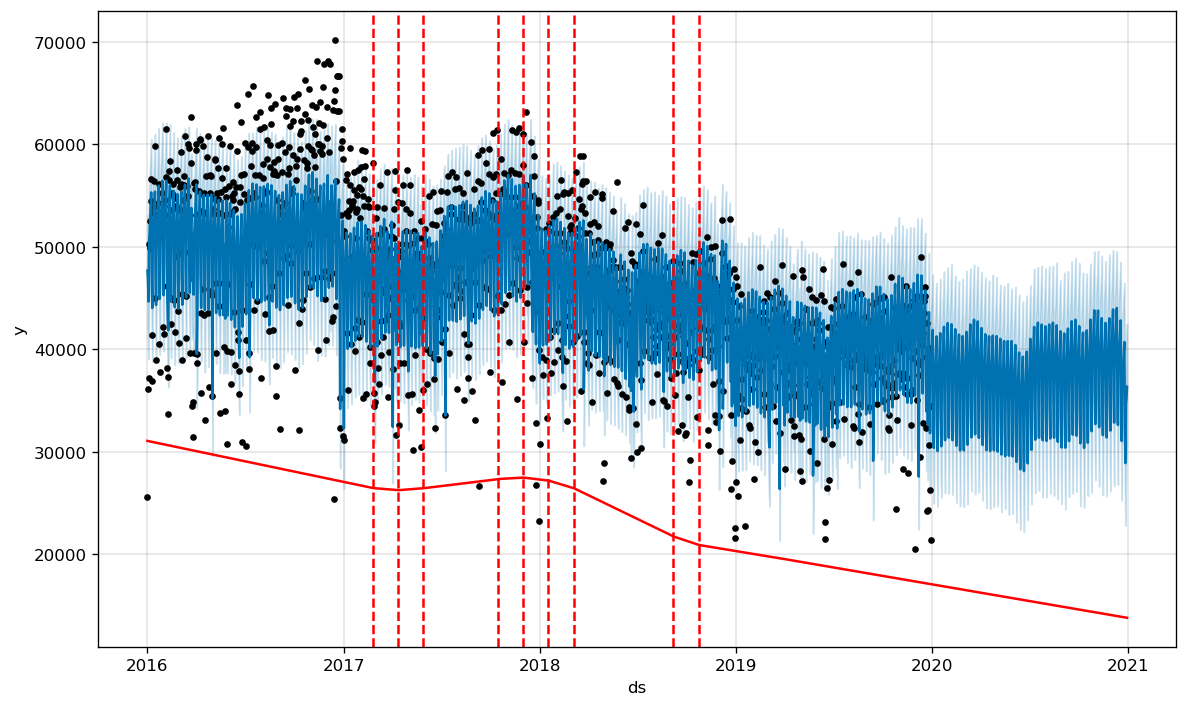

In [176]:
fig1 = m.plot(forecast3)
tendencia1 = add_changepoints_to_plot(fig1.gca(),m,forecast3)

Al agregar nuevos regresores, en este caso la mediana de los vehiculos livianos y la mediana de los vehiculos pesados, el modelo prophe no mejoro con respecto al modelo donde solo se le incorporaron los días festivos, días de paro y cierre de la autopista. Los nuevos regresores generaron mucho ruido en el modelo prophet, deteriorando el RMSE para predecir el año 2020. Cabe resaltar que al agregar el parametro holidays al modelo, permitio que este obtuviera un error mas bajo. 

Como opción de mejora para el modelo que solo tiene el parametro holidays, una buena exploración o siguente paso para este apartado, es adicionarle el regresor de los vehiculos livianos y pesados, incorporando los datos originales y no las medianas de estos, que producen tanto ruido en el modelo.